# Breast Cancer Classifier Comparison

By Iván del Horno Sotillo

This notebook is part of a Bachelor Thesis project. The main goal of this project is to compare different machine learning algorithms in order to find the best one for the classification of breast cancer. The dataset used is the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) from the UCI Machine Learning Repository.

The dataset contains 569 samples of benign and malignant tumor cells with features computed from an image obtained from a FNAB (Fine Needle Aspirate Biopsy).

More information will be available in the Thesis document.

## 1. Preparation

### Importing libraries and dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [4]:
# Load the data
data = load_breast_cancer()

# Create a dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Swap the 0s and 1s in the target column so that 0 is benign and 1 is malignant
# It is just personal preference, I think it is easier to read this way
df['target'] = df['target'].apply(lambda x: 0 if x == 1 else 1)

### Basic information about the dataset

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Thanks to importing the dataset directly from Scikit-Learn, we can get some basic information about it.
We can see that we have 569 samples, out of which 212 are malignant and 357 are benign. The dataset has 30 features which are all numeric values. We can also see that there are no missing values.

The 30 features are based on 10 attributes (listed in the description above), and from each attribute we obtain the mean, the standard error and the worst (mean of the three largest values).

Then we have two classes, either malignant or benign tumor.

## 2. Exploratory Data Analysis

Now that we have loaded the dataset, and saw the basics of it, we can start a more in-depth exploration of the data.

Before we do so we will perform a training and test split, this is done so that we can explore and analyze the data without seeing the insights of the test set, just as we would do in a real scenario.

This step is really important since it will help us understand the data that we are using, the relationships between the different features, which features are more important, etc. With this information we will be able to make more educated decisions when preprocessing the data and optimizing the classifiers.

To carry out this analysis we will do the following:
1. **Descriptive Statistics:** We will have a look at numerical description of the data by means of the measurements: mean, standard deviation, minimum, maximum, etc.
2. **Data Visualization:** We will plot the data in order to see the relationships between the different features and the classes.

### 2.0. Training and test split

The training and test split in this case is going to be done with a 70/30 ratio. This ratio has been chosen because although the dataset is not very big, it will allow us to have a good amount of data for training while still having enough data to properly test the models.

In [22]:
# Split the data into train and test sets

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

# Convert the training into a dataframe so that we can analyze it
train_df = pd.DataFrame(X_train, columns=data.feature_names)
train_df['target'] = y_train

### 2.1 Descriptive Statistics

#### Basic statistics

In [23]:
train_df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   398.000000    398.000000      398.000000   398.000000   
mean     14.176191     19.287412       92.281859   655.878643   
std       3.411840      4.202438       23.569193   333.480549   
min       6.981000     10.720000       43.790000   143.500000   
25%      11.842500     16.172500       76.155000   432.100000   
50%      13.455000     18.890000       87.175000   557.400000   
75%      15.780000     21.600000      104.000000   782.675000   
max      27.220000     39.280000      182.100000  2250.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       398.000000        398.000000      398.000000           398.000000   
mean          0.096645          0.104381        0.088975             0.049688   
std           0.014610          0.053174        0.079788             0.039057   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086443          0.063745        0.029600             0.020575   
50%           0.096335          0.093125        0.061400             0.035215   
75%           0.105975          0.130475        0.130350             0.074030   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     398.000000              398.000000  ...     398.000000   
mean        0.182181                0.062511  ...      25.700930   
std         0.027420                0.006984  ...       6.004399   
min         0.120300                0.049960  ...      12.490000   
25%         0.162250                0.057645  ...      21.222500   
50%         0.179400                0.061180  ...      25.445000   
75%         0.195700                0.065735  ...      29.622500   
max         0.304000                0.097440  ...      45.410000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       398.000000   398.000000        398.000000         398.000000   
mean        107.467186   876.222111          0.132618           0.255940   
std          32.090097   525.505507          0.022879           0.160203   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.665000   524.050000          0.116850           0.144575   
50%          98.135000   688.100000          0.131550           0.209650   
75%         125.050000  1063.500000          0.146375           0.342675   
max         220.800000  3216.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       398.000000            398.000000      398.000000   
mean          0.274623              0.116142        0.294003   
std           0.211994              0.065390        0.063455   
min           0.000000              0.000000        0.160300   
25%           0.109350              0.064943        0.253325   
50%           0.231400              0.101600        0.283350   
75%           0.386400              0.162725        0.319525   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               398.000000  398.000000  
mean                  0.083688    0.374372  
std                   0.018307    0.484569  
min                   0.056950    0.000000  
25%                   0.071010    0.000000  
50%                   0.079195    0.000000  
75%                   0.092202    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

From this quick statistical description we can see some interesting things:
- The median (50%) is usually a bit smaller than the mean, which would mean that the data is lightly skewed, we will see this in the next section.
- The difference between the 75% and the max is quite big in some cases (worst area 75% = 1063 and worst area max = 3216), which would mean that there are some outliers in the data, this will also be seen later.
- The range in some values is pretty large, for example in mean area we go from a min of 143.5 to a max of 2250.0, this means that we will have to scale the data in order to be able to use it in some classifiers.
- The standard deviation is also quite large in some cases, for example in worst area we have a standard deviation of 525.5, this points out that the data is really spread out emphasizing the need to scale the data.
- Lastly, some features such as mean fractal dimension have values that go from 0.050 to 0.097 and others like worst area from 185 to 3216, this further emphasizes the need to scale the data.

#### Skewness

In [16]:
print(train_df.skew())

mean radius                0.847937
mean texture               0.716443
mean perimeter             0.901460
mean area                  1.387673
mean smoothness            0.510505
mean compactness           1.227819
mean concavity             1.444474
mean concave points        1.148988
mean symmetry              0.843499
mean fractal dimension     1.411478
radius error               1.684181
texture error              1.782360
perimeter error            1.853192
area error                 2.154547
smoothness error           2.601083
compactness error          1.970817
concavity error            5.590149
concave points error       1.669087
symmetry error             2.322531
fractal dimension error    4.125322
worst radius               0.958225
worst texture              0.440855
worst perimeter            0.972106
worst area                 1.493861
worst smoothness           0.418460
worst compactness          1.548695
worst concavity            1.247369
worst concave points       0

The skewness measures the assymetry of the probability distribution.
- If skewness < -1 or skewness > 1, the distribution is highly skewed.
- If skewness is close to 0, the distribution is approximately symmetric.
- If the skewness is positive, we say it is right skewed, if it is negative, it is left skewed.

We will omit the target since it is not a feautre but a class.

From the values that we have obtained we can see that all of them are positive, which means that all the features are right skewed. Some of them are highly skewed with values of up to 5.45 in the case of area error. This unevenness in the distribution is not only product of the nature of the data, but also because of outliers which we will see in the data visualization section.

### 2.2 Data Visualization

In the previous section we saw an overview of the numerical description of the data, now we will plot the data to better undesrtand what we saw and to see the relationships between the different features.

#### Data Distribution

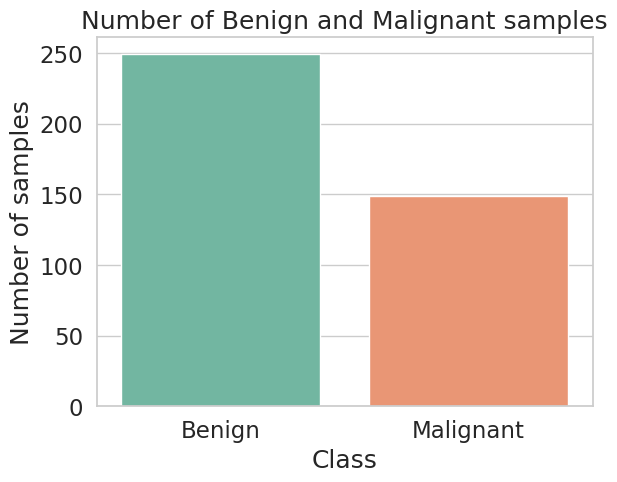

Total number of samples: 398
Percentage of Benign samples: 62.56 %
Percentage of Malignant samples: 37.44 %


In [25]:
# Copy of the dataframe but replacing the class numbers with the class names
labeled_df = train_df.copy()
labeled_df['target'] = labeled_df['target'].replace({0: 'Benign', 1: 'Malignant'})

sns.set_style("whitegrid")

# Custom color palette so that malignant are red and benign are blue
set2_palette = sns.color_palette('Set2')
set2_palette[0], set2_palette[1] = set2_palette[1], set2_palette[0]

# In this case it wasnt needed
sns.set_palette('Set2')

sns.countplot(x='target', hue='target', data=labeled_df, legend=False, order=['Benign', 'Malignant'])

plt.title('Number of Benign and Malignant samples')
plt.xlabel("Class")
plt.ylabel("Number of samples")

plt.show()

print('Total number of samples:', len(train_df))
print('Percentage of Benign samples:', round(train_df['target'].value_counts()[0] / len(train_df) * 100, 2), '%')
print('Percentage of Malignant samples:', round(train_df['target'].value_counts()[1] / len(train_df) * 100, 2), '%')

From this information we can see that the class distribution is imbalanced, with a 62% of the samples being benign and a 37% being malignant. Although it is not a really big difference, it is something that we will have to remember and pay attention since it could mean that the classifiers will be biased towards the benign class (majority class).

#### Correlation Matrix

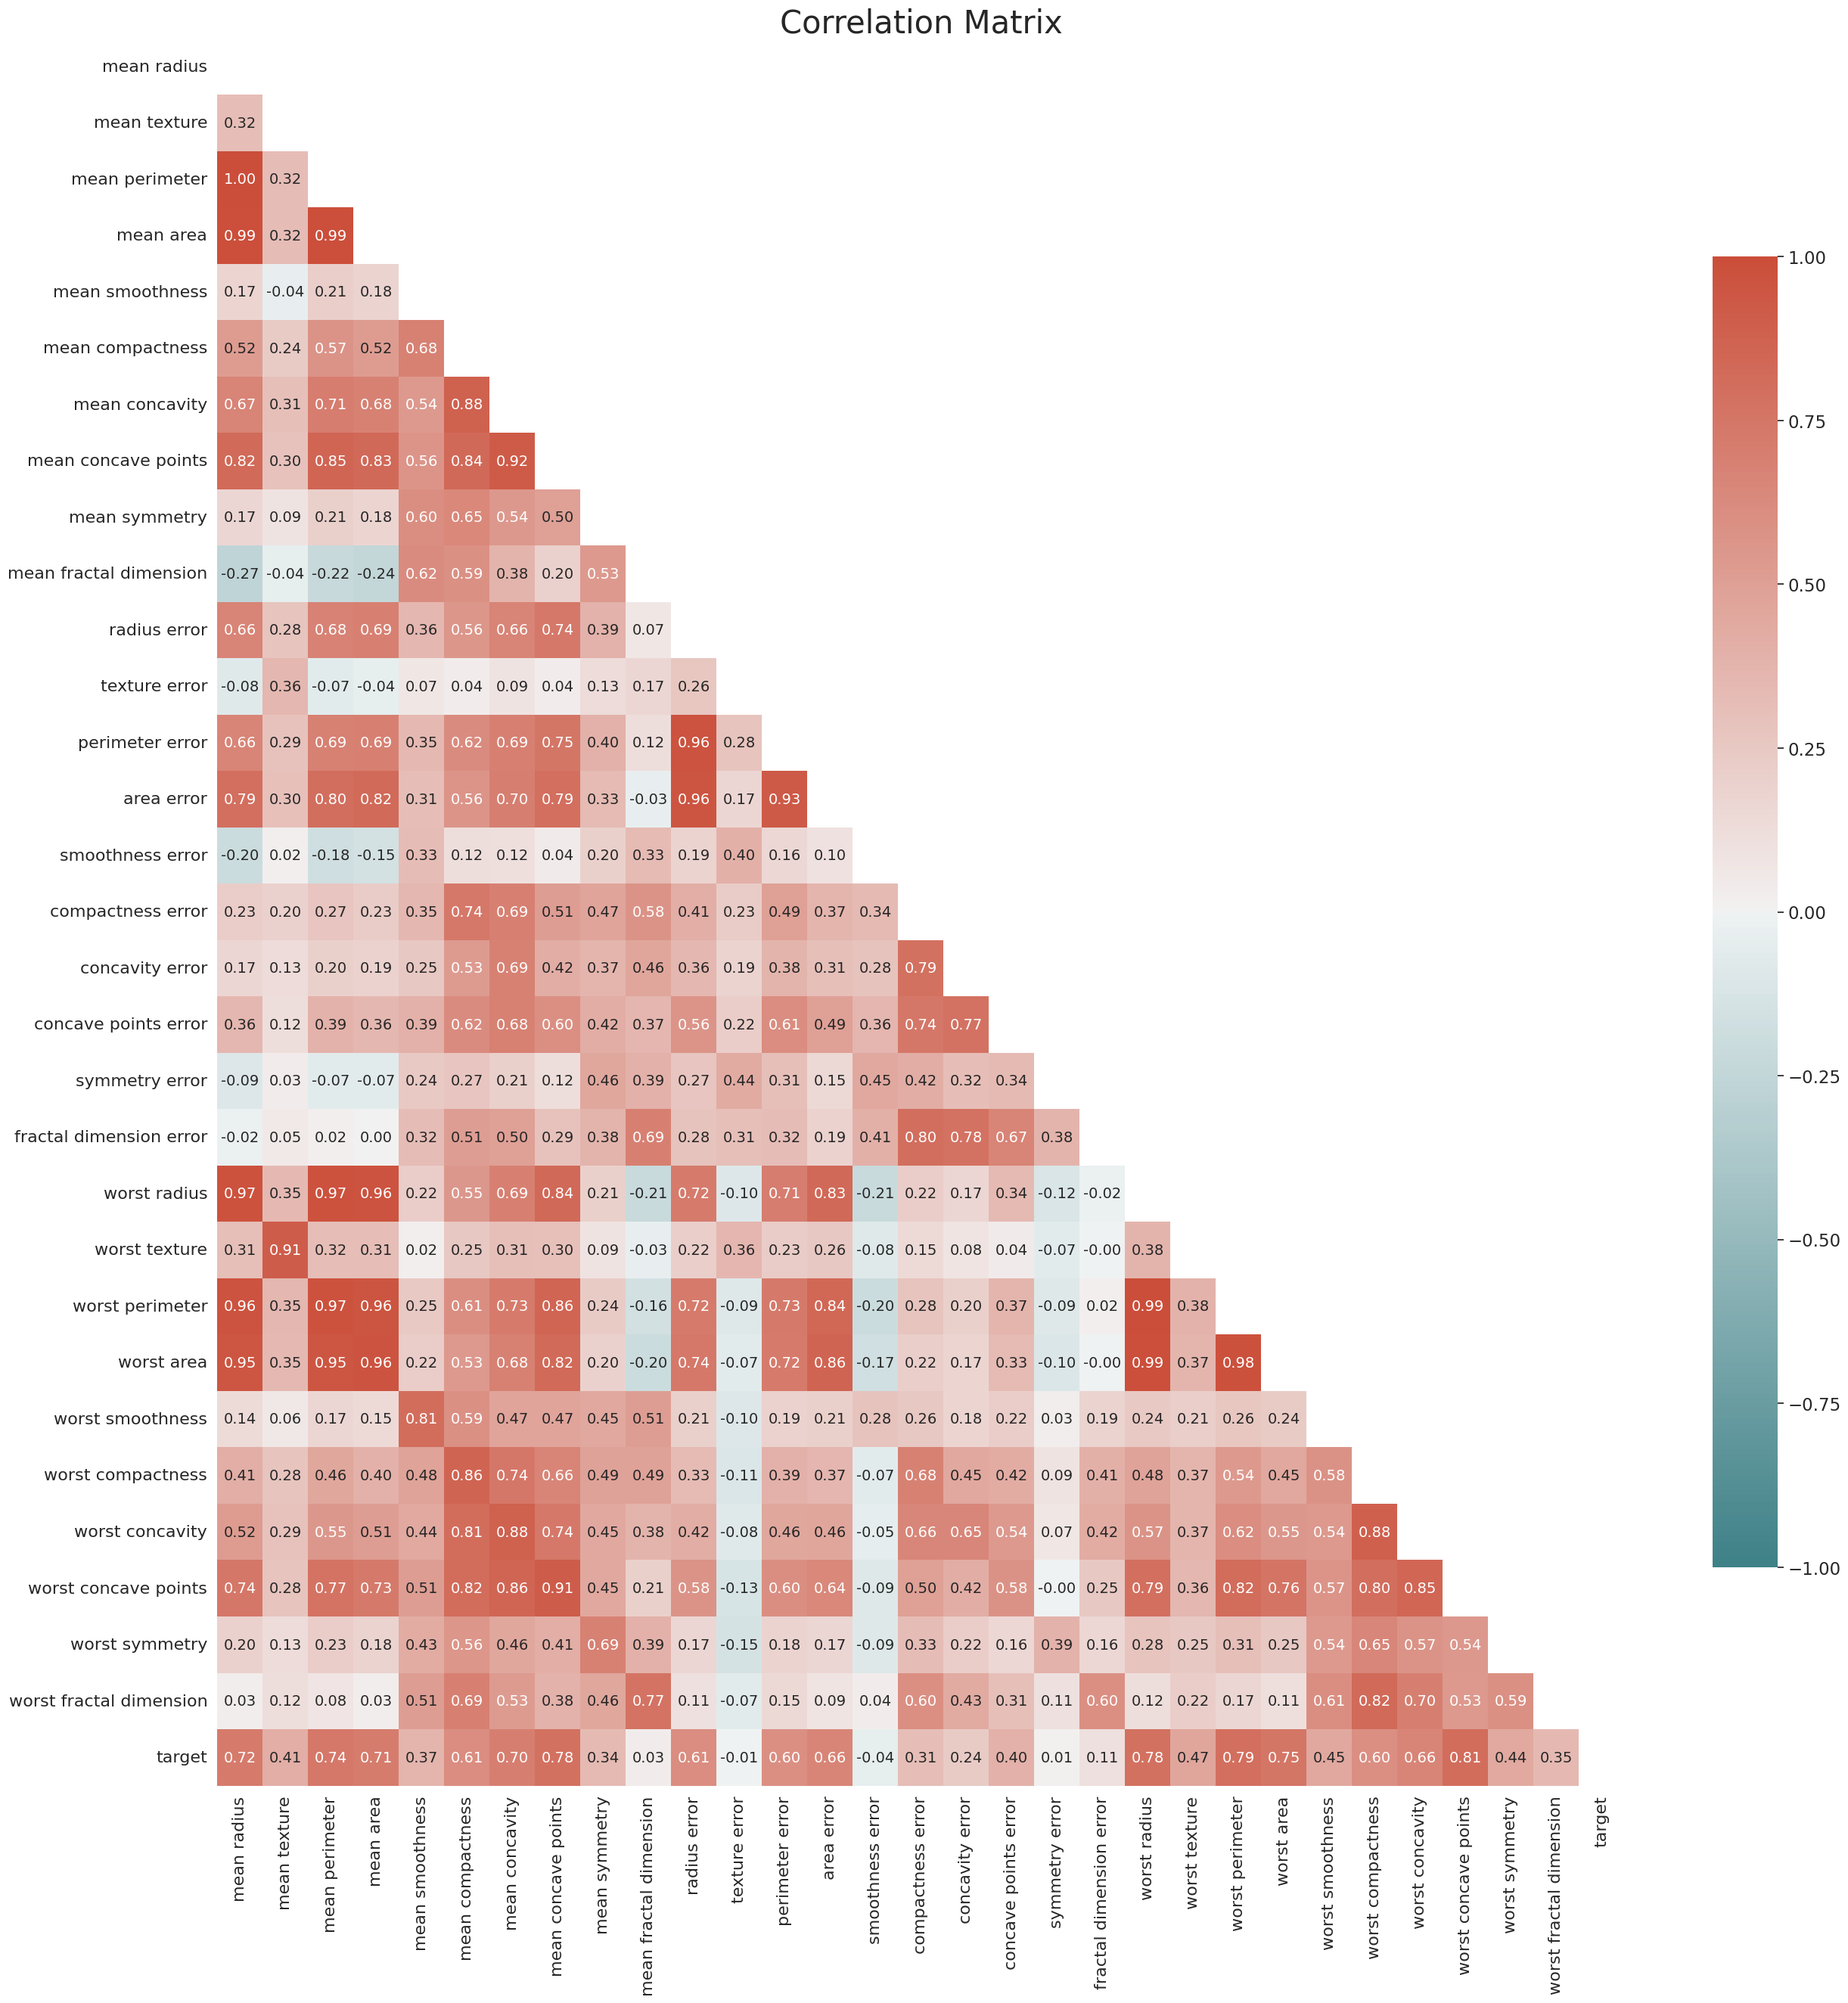

In [19]:
corr = train_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(30, 30))

# Custom diverging colormap so it matches with the previous graph
set2_diverging_palette = sns.diverging_palette(202, 17, as_cmap=True)

sns.set_style("white")
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=set2_diverging_palette,
            vmin=-1, vmax=1, cbar_kws={"shrink": 0.75}, annot_kws={"fontsize": 14})

plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Correlation Matrix", fontsize=30)
plt.show()


The matrix above is called the correlation matrix, it shows the correlation between two different features. The values range from -1 to 1, where the extremes mean that the features are highly correlated while the values close to 0 mean that the features are not correlated at all.

From this matrix we can see that there are some features that are highly correlated, to make sure that we don't skip any of them while looking at the heatmap (since there are a lot of features), we will now print the features that are highly correlated.

First we will look at the features that have an absolute value of correlation higher than 0.9 but not 1.0 since that would mean that they are correlated with themselves.

In [20]:
high_corr = corr[(corr > 0.9) & (corr != 1.0)].stack().reset_index()

high_corr = high_corr.rename(
    columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})

high_corr[['Feature 1', 'Feature 2']] = np.sort(
    high_corr[['Feature 1', 'Feature 2']].values, axis=1)
high_corr['Correlation'] = high_corr['Correlation'].apply(
    lambda x: round(x, 2))

high_corr = high_corr.drop_duplicates().sort_values(
    by='Correlation', ascending=False)

high_corr

Feature 1             Feature 2  Correlation
0        mean perimeter           mean radius         1.00
1             mean area           mean radius         0.99
28      worst perimeter          worst radius         0.99
29           worst area          worst radius         0.99
7             mean area        mean perimeter         0.99
35           worst area       worst perimeter         0.98
9        mean perimeter       worst perimeter         0.97
2           mean radius          worst radius         0.97
8        mean perimeter          worst radius         0.97
19      perimeter error          radius error         0.96
3           mean radius       worst perimeter         0.96
15            mean area            worst area         0.96
13            mean area          worst radius         0.96
14            mean area       worst perimeter         0.96
20           area error          radius error         0.96
4           mean radius            worst area         0.95
10       mean perimeter            worst area         0.95
22           area error       perimeter error         0.93
16  mean concave points        mean concavity         0.92
5          mean texture         worst texture         0.91
18  mean concave points  worst concave points         0.91

From this we can see that there are multiple features that are highly correlated, this is because some of them are mathematically correlated already, such as the mean radius and mean perimeter. We can also note that if a feature is correlated with another, it is usually also correlated with the other instances of that feature, for example, mean area and mean perimeter are correlated, and worst area and worst perimeter are also correlated, also for the error instances. There are also high correlations between the mean and the worst values of some features. Lastly, the concavity and concave points are also highly correlated, what indicates that when the number of concave points increases, the severity of these ones also increases.

To better see the correlation between each feauture we will now do pairplots.

#### Pairplots

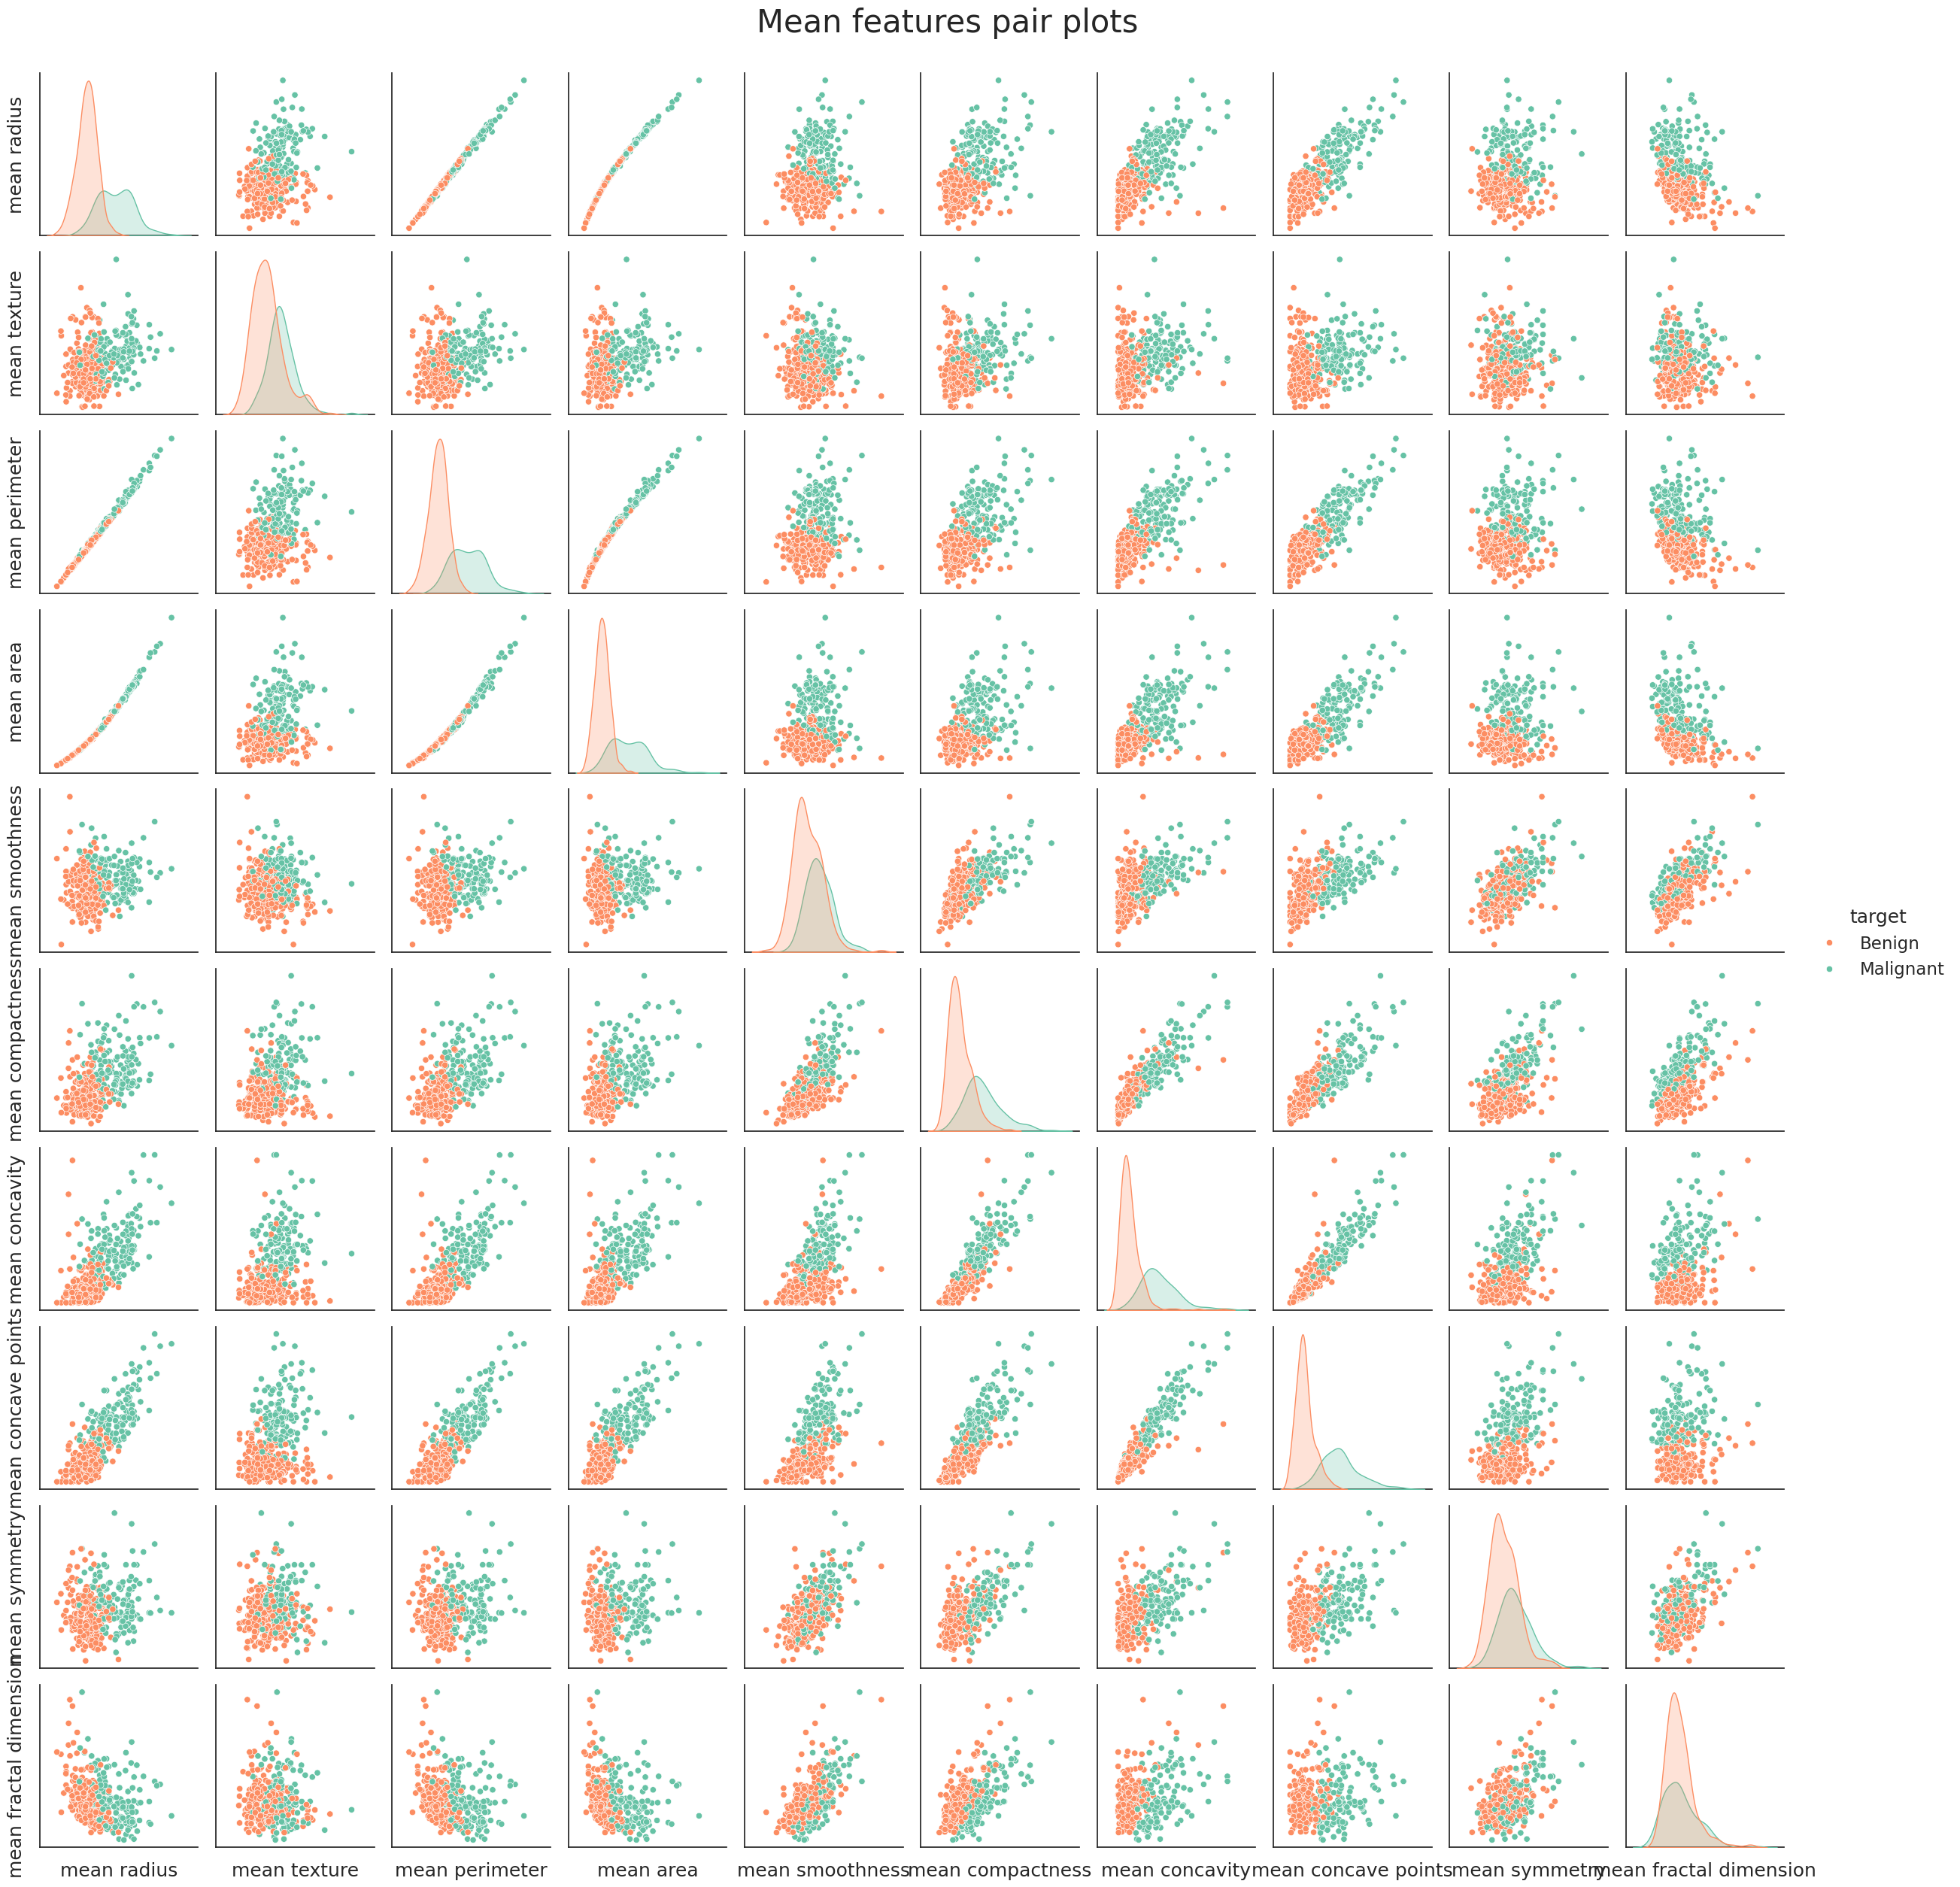

In [21]:
# only the mean features bc if not it is illegible
mean_columns = [col for col in train_df.columns if 'mean' in col]
df_mean = labeled_df[mean_columns].copy()

df_mean.loc[:, 'target'] = labeled_df['target']

sns.set(font_scale=1.5, style="white", color_codes=True)
# take the first two colros to avoid warning!
g = sns.pairplot(df_mean, hue='target', palette=set2_palette[:2])
g.fig.suptitle("Mean features pair plots", y=1.02, fontsize=30)

# we dont need the numbers on the axis now, we just care about the plot
for ax in g.axes.flatten():
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()


We just plotted the correlation between the mean features since the worst and error had similar values in the correlation matrix and having a pair plot of 30 by 30 is not really useful.

The key observation in these plots is that they are somewhat separable, which means that we will be able to design a classifier that is able to distinguish between benign and malignant samples.

#### Class Distribution for each Feature

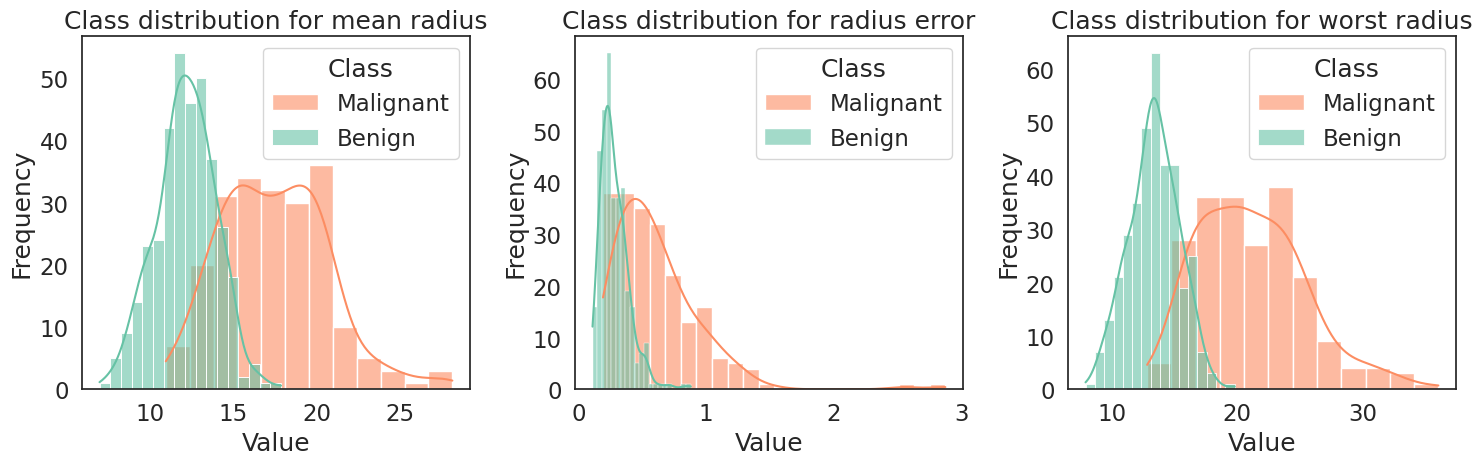

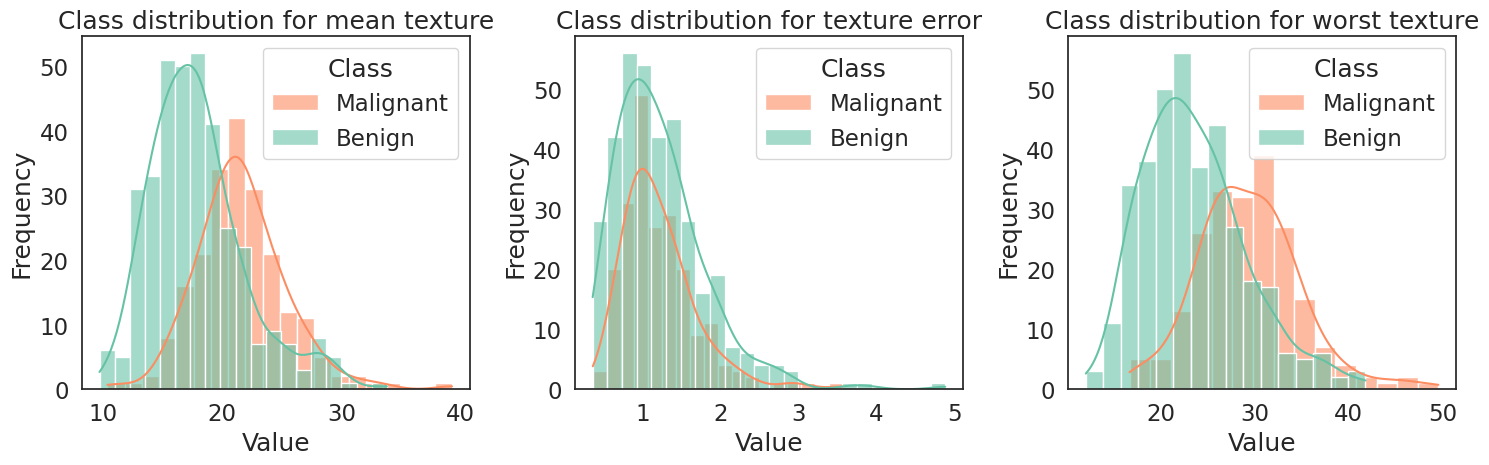

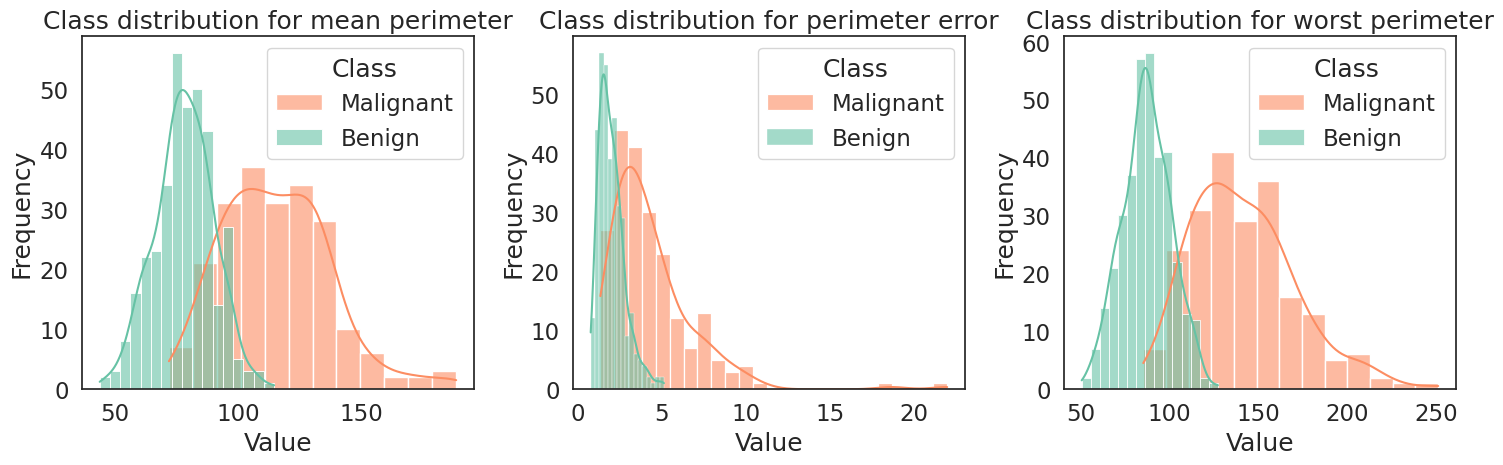

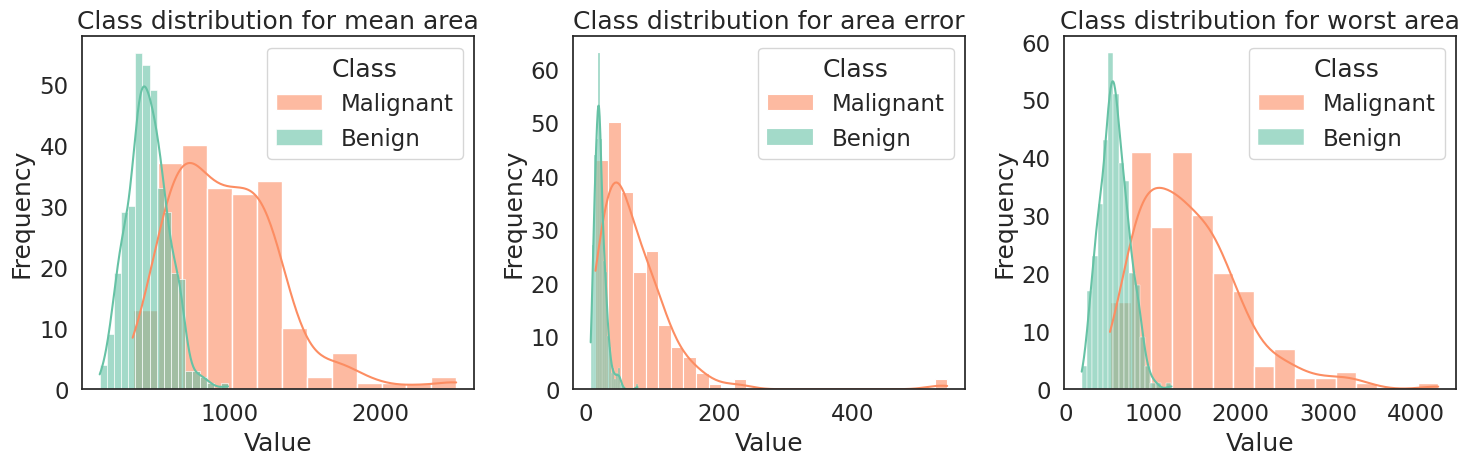

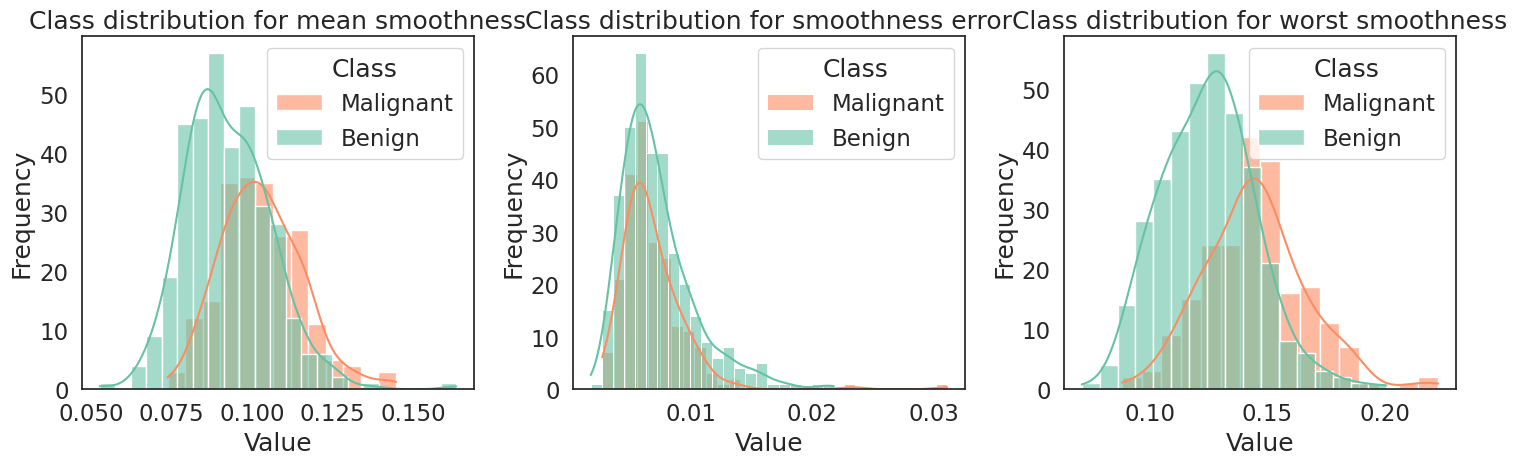

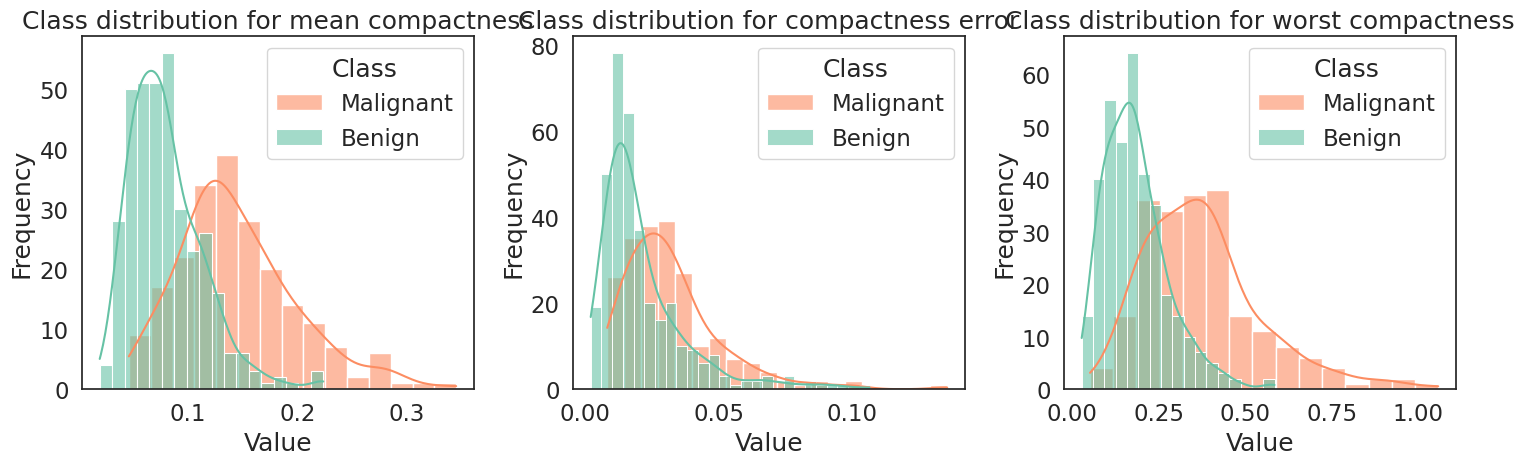

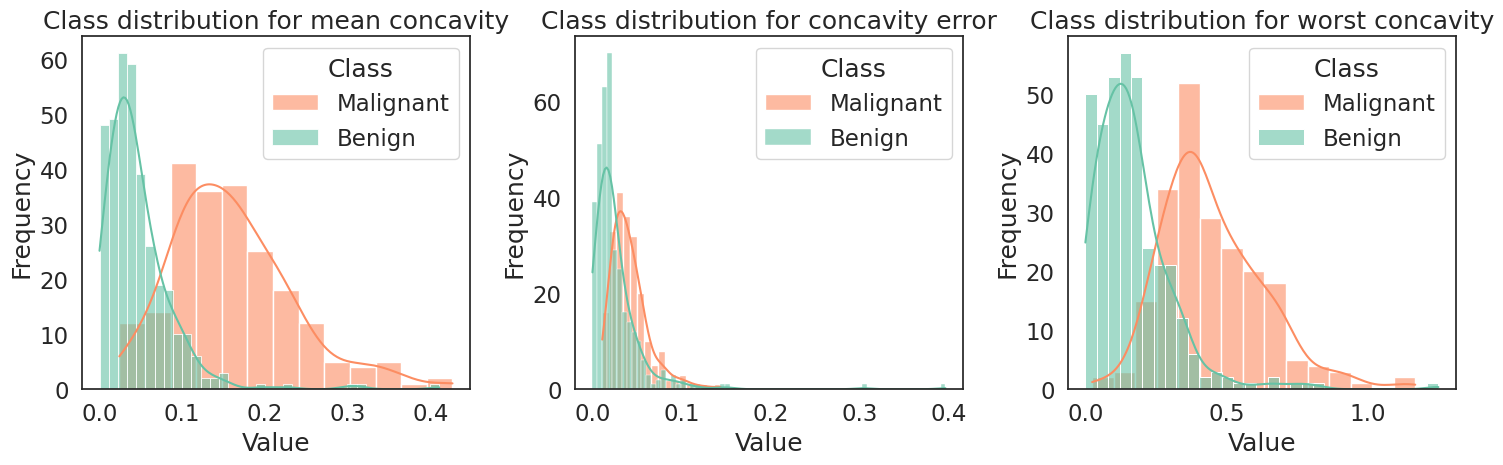

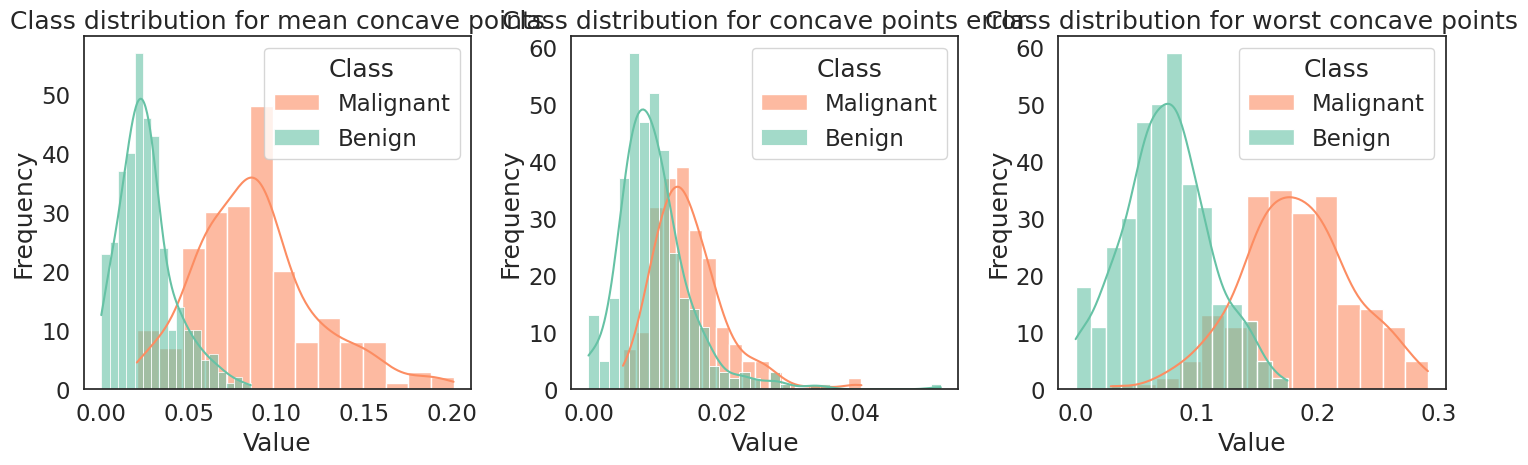

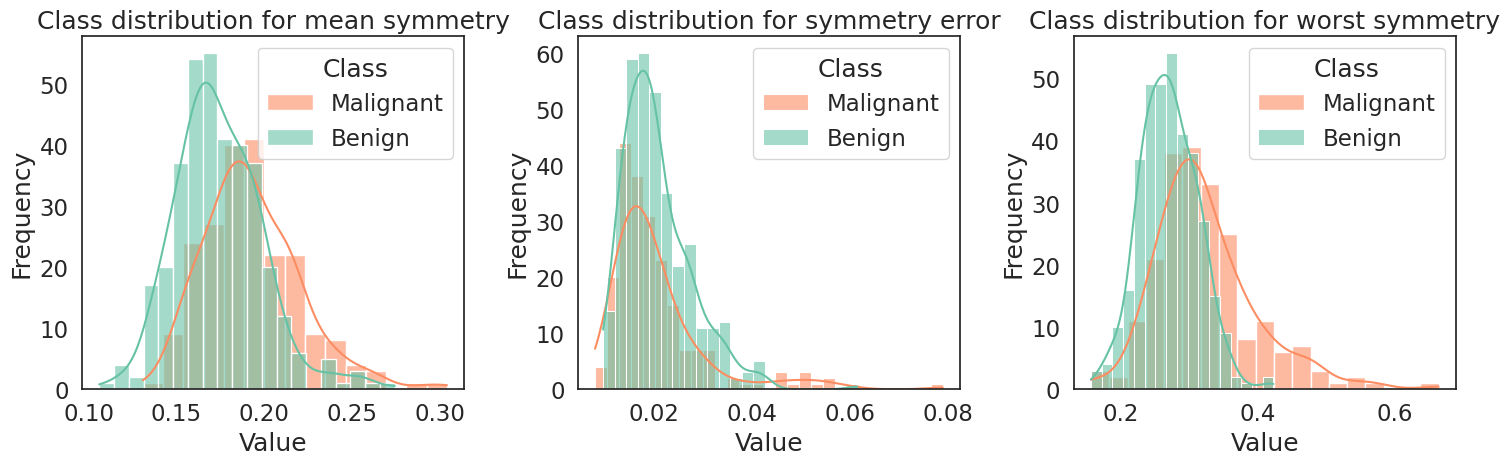

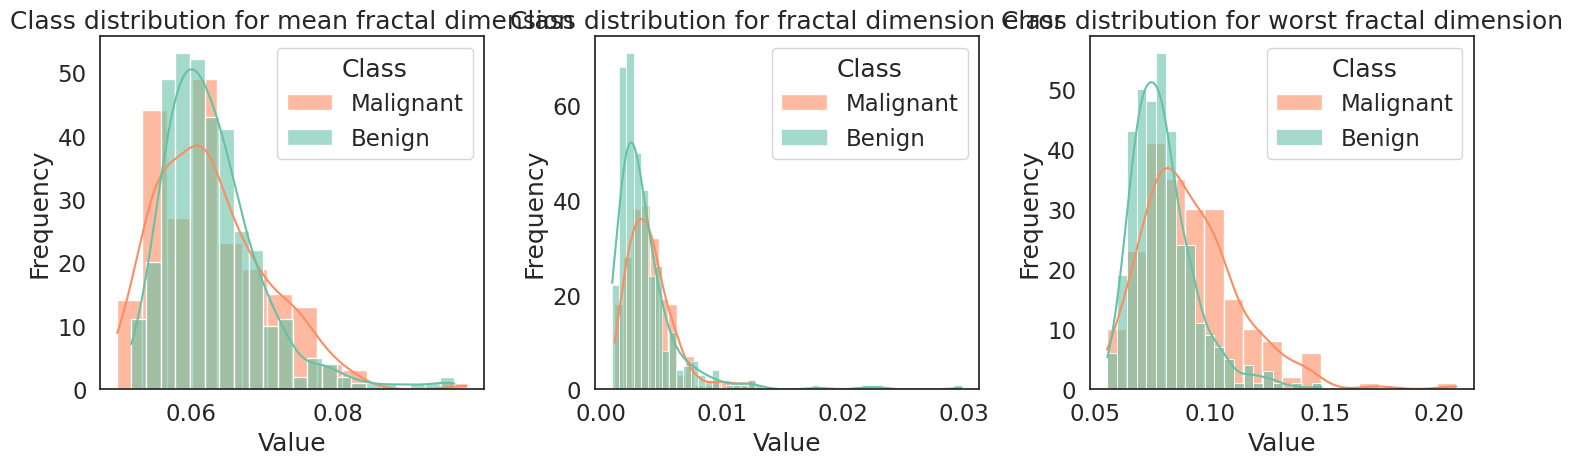

In [ ]:

feature_groups = ['mean', 'error', 'worst']
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
            'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']

# true -> all plots in one big figure, false -> mean, error and worst of each feature in one plot
all_together = False

sns.set_palette(set2_palette)

if all_together:
    fig, axs = plt.subplots(len(features), 3, figsize=(15, 5*len(features)))
else:
    axs = None

for j, feature in enumerate(features):
    if not all_together:
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, group in enumerate(feature_groups):
        if group == 'error':
            column = f'{feature} {group}'
        else:
            column = f'{group} {feature}'

        for class_label in labeled_df['target'].unique():
            subset = labeled_df[labeled_df['target'] == class_label]
            if all_together:
                sns.histplot(data=subset, x=column, kde=True, label=str(
                    class_label), alpha=0.6, ax=axs[j, i])
            else:
                sns.histplot(data=subset, x=column, kde=True,
                             label=str(class_label), alpha=0.6, ax=axs[i])

        if all_together:
            axs[j, i].set_title(f'Class distribution for {column}')
            axs[j, i].set_xlabel('Value')
            axs[j, i].set_ylabel('Frequency')
            axs[j, i].legend(title='Class')
        else:
            axs[i].set_title(f'Class distribution for {column}')
            axs[i].set_xlabel('Value')
            axs[i].set_ylabel('Frequency')
            axs[i].legend(title='Class')

    if not all_together:
        plt.tight_layout()
        plt.show()

if all_together:
    plt.tight_layout()
    plt.show()

After seeing the distribution of each class among the different features, we can see that there are some features that look more separable than others, for example we can see that in the fractal dimension, smoothness and symmetry plots, the malignant and benign are overlapping each other, what results in a complicated separation. On the other hand, features like the concavity, concave points, or the perimeter are more easily separable.

#### Density Plots

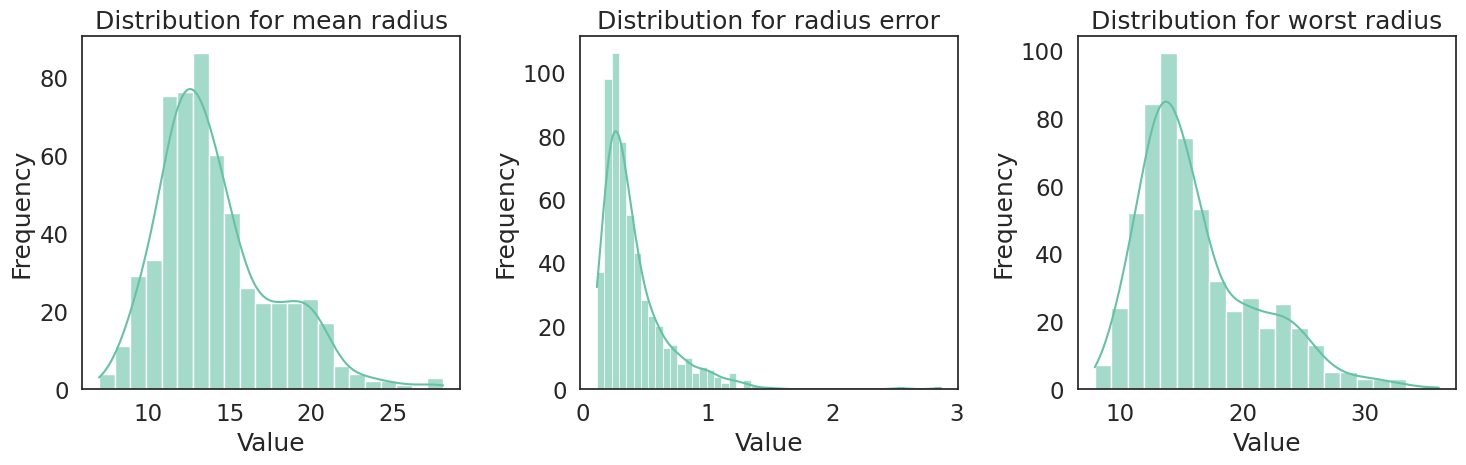

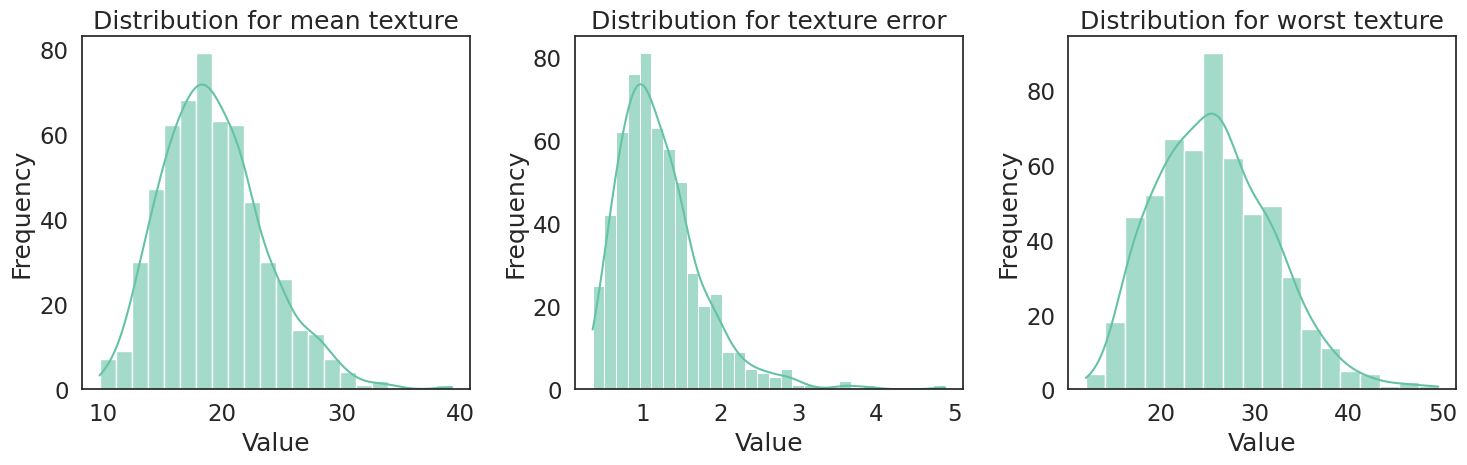

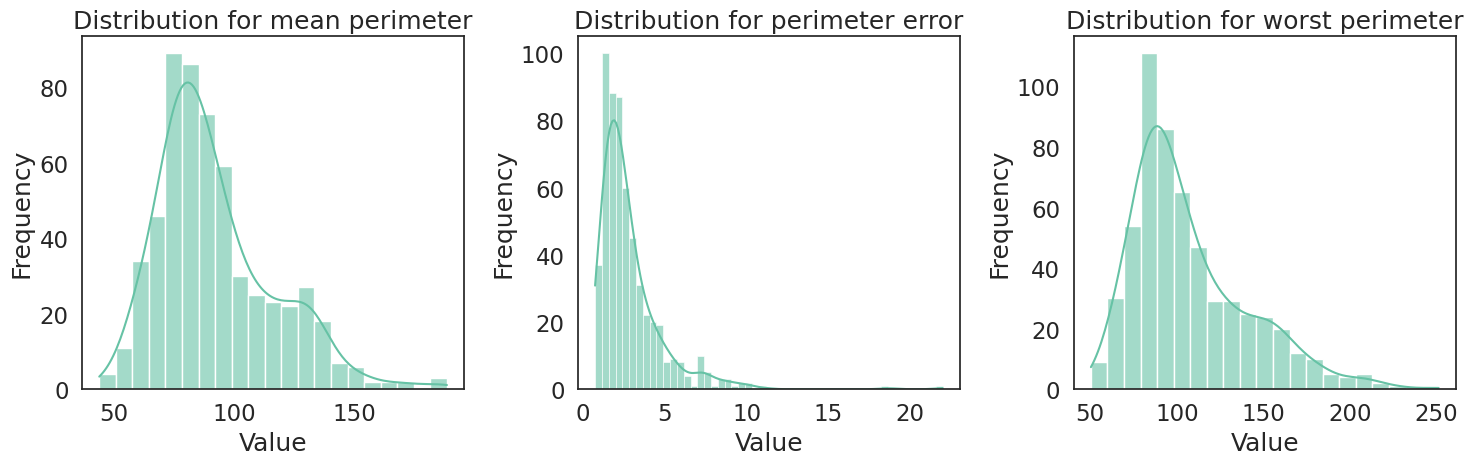

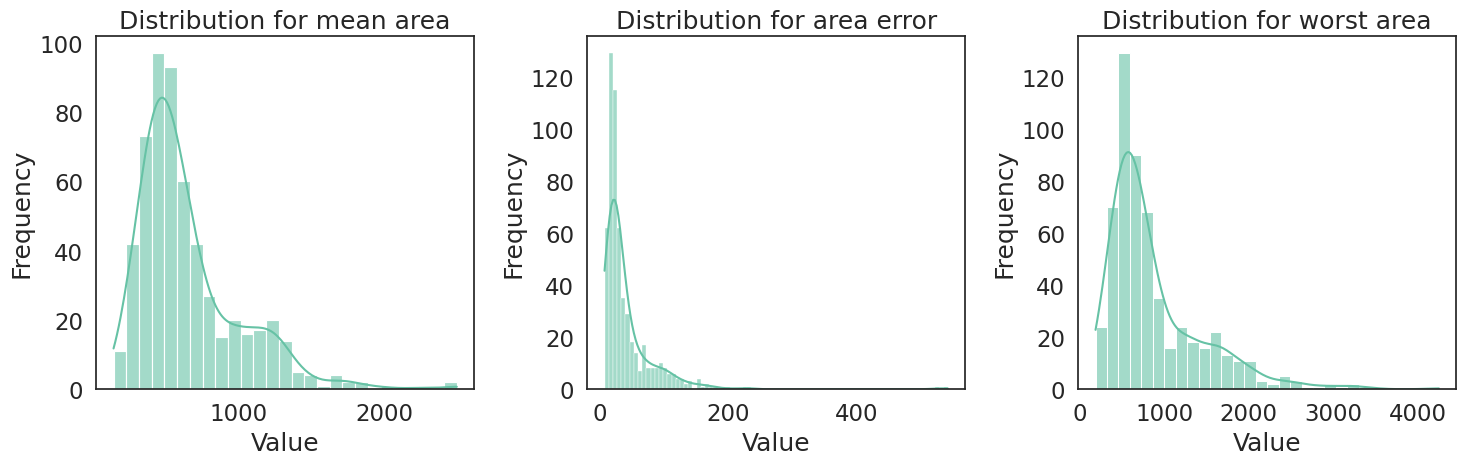

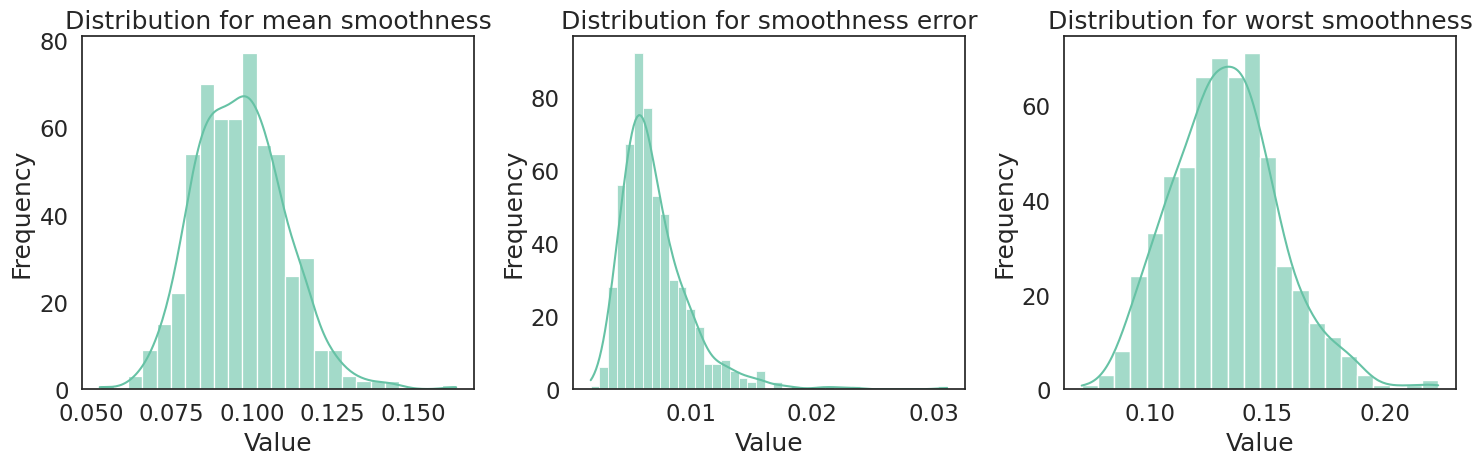

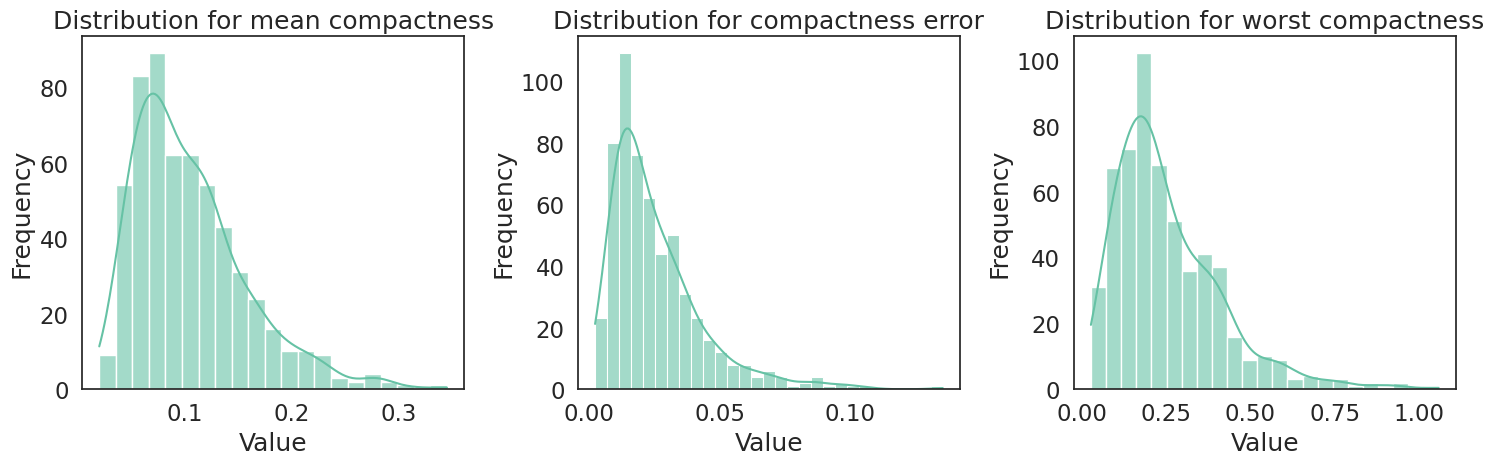

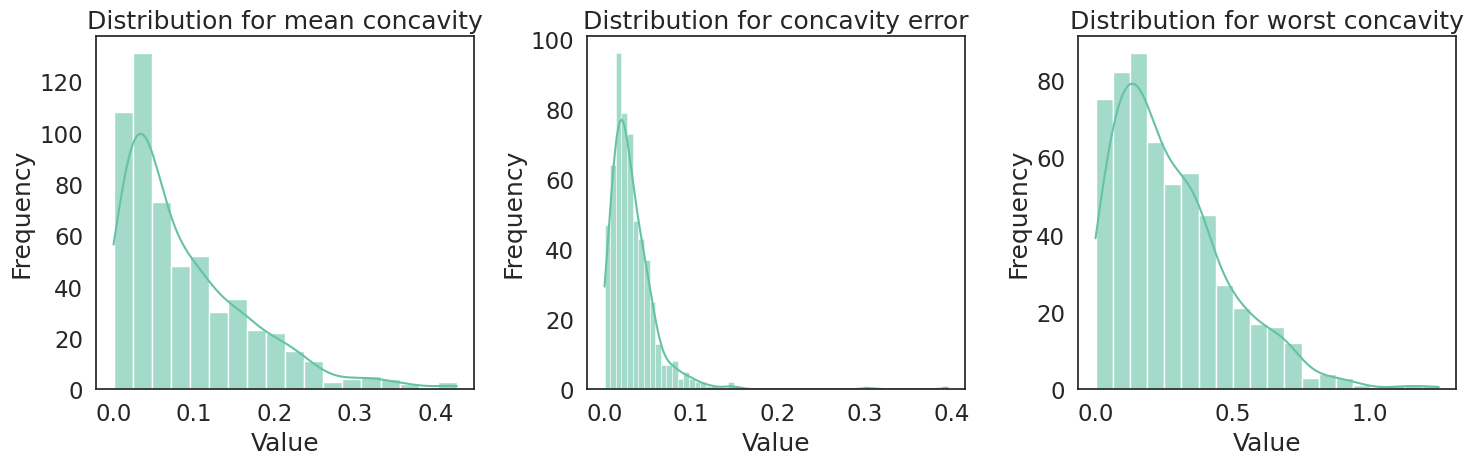

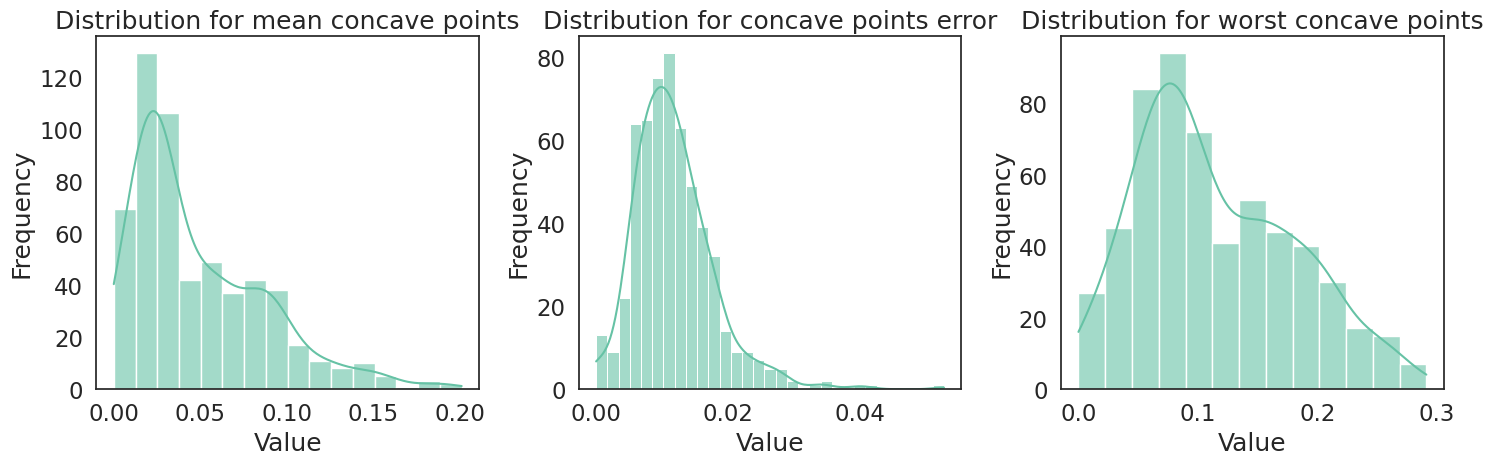

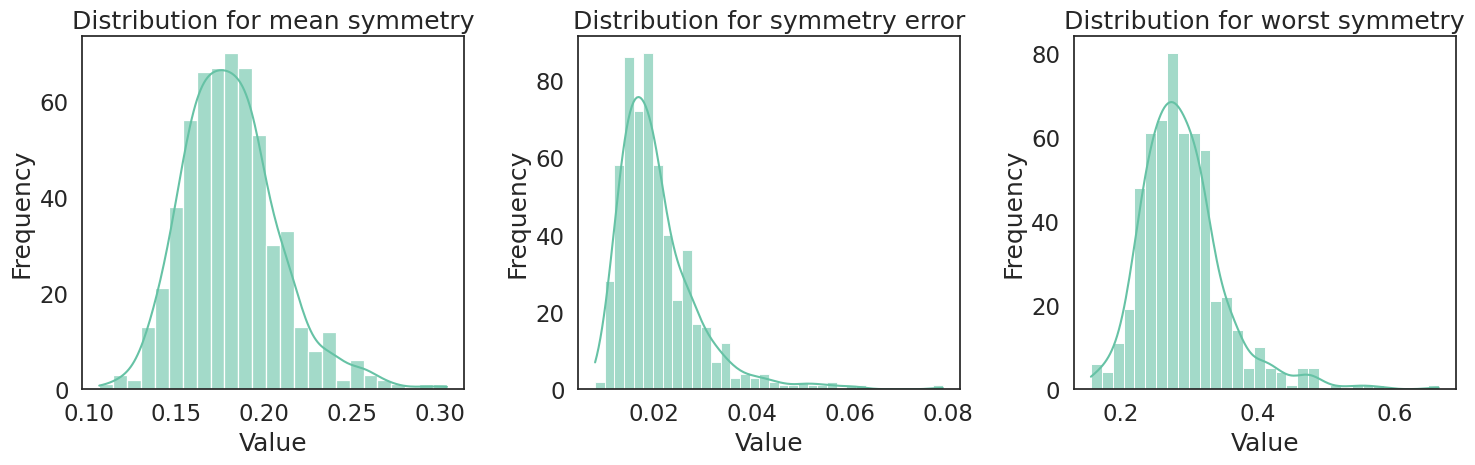

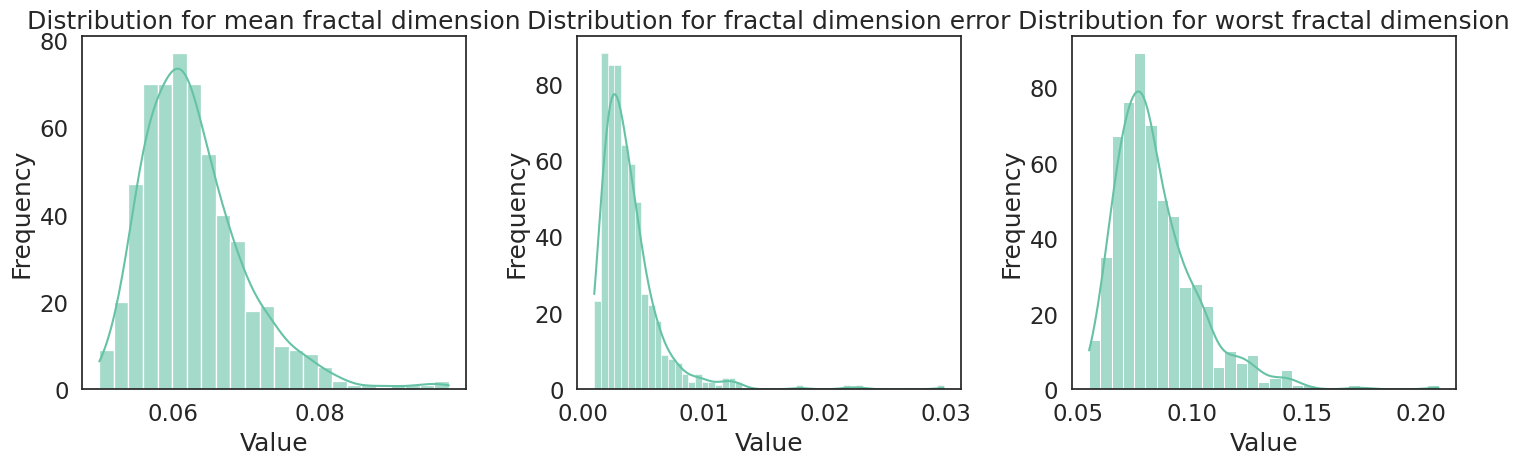

In [ ]:
# Define the features you're interested in
feature_groups = ['mean', 'error', 'worst']
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
            'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']

# true -> all plots in one big figure, false -> mean, error and worst of each feature in one plot
all_together = False

sns.set_palette('Set2')

if all_together:
    fig, axs = plt.subplots(len(features), 3, figsize=(15, 5*len(features)))
else:
    axs = None

for j, feature in enumerate(features):
    if not all_together:
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, group in enumerate(feature_groups):
        if group == 'error':
            column = f'{feature} {group}'
        else:
            column = f'{group} {feature}'

        if all_together:
            sns.histplot(data=df, x=column, kde=True, alpha=0.6, ax=axs[j, i])
        else:
            sns.histplot(data=df, x=column, kde=True, alpha=0.6, ax=axs[i])

        if all_together:
            axs[j, i].set_title(f'Distribution for {column}')
            axs[j, i].set_xlabel('Value')
            axs[j, i].set_ylabel('Frequency')
        else:
            axs[i].set_title(f'Distribution for {column}')
            axs[i].set_xlabel('Value')
            axs[i].set_ylabel('Frequency')

    if not all_together:
        plt.tight_layout()
        plt.show()

if all_together:
    plt.tight_layout()
    plt.show()

After comparing the distribution of the classes for each feature, we will now analyze the density plots for each feature without the class distribution.

From what we see in the density plots, we can see that overall there is a tendency for the features to be right skewed, which if we recall from the skewness section, we saw that all the features had a positive skewness, so this is expected. Other than that, note that most of them have a normal distribution.

#### Box and Violin Plots

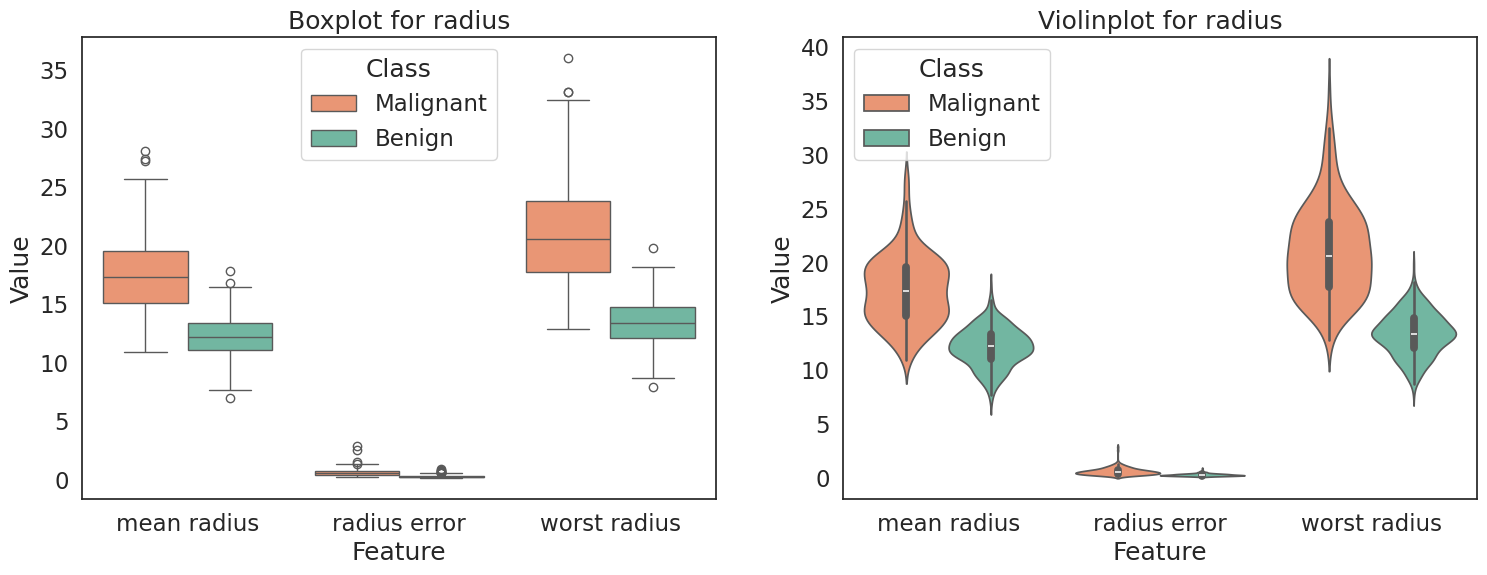

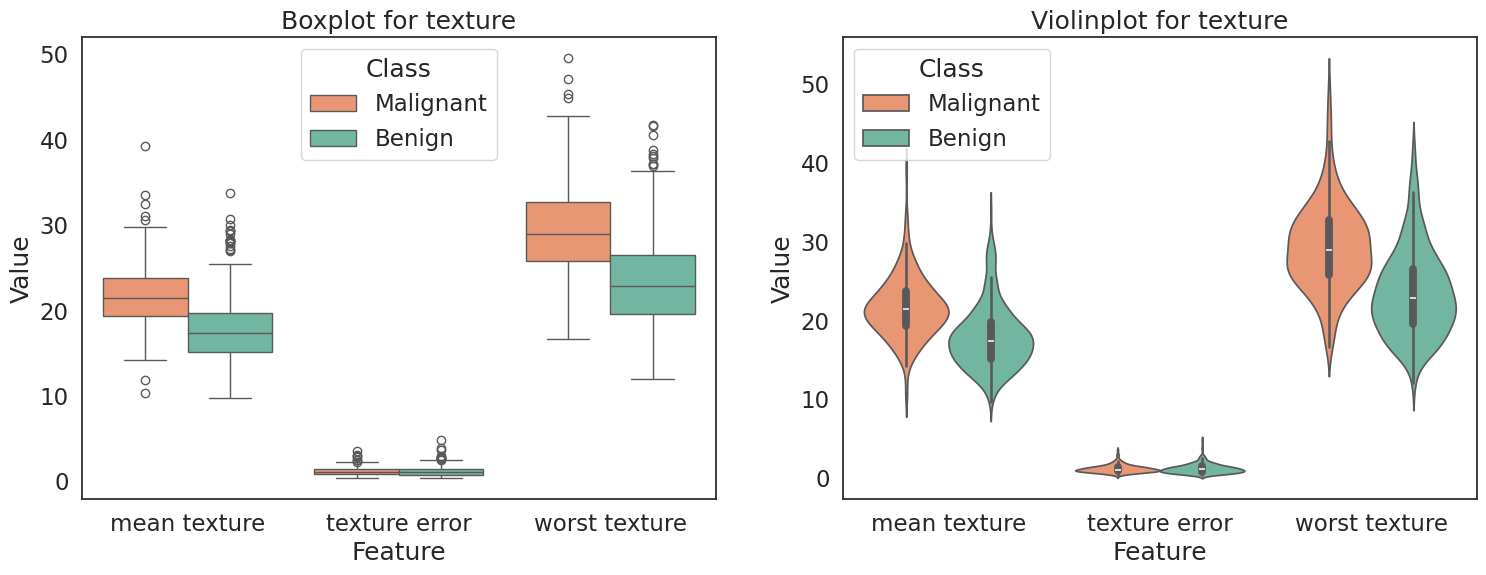

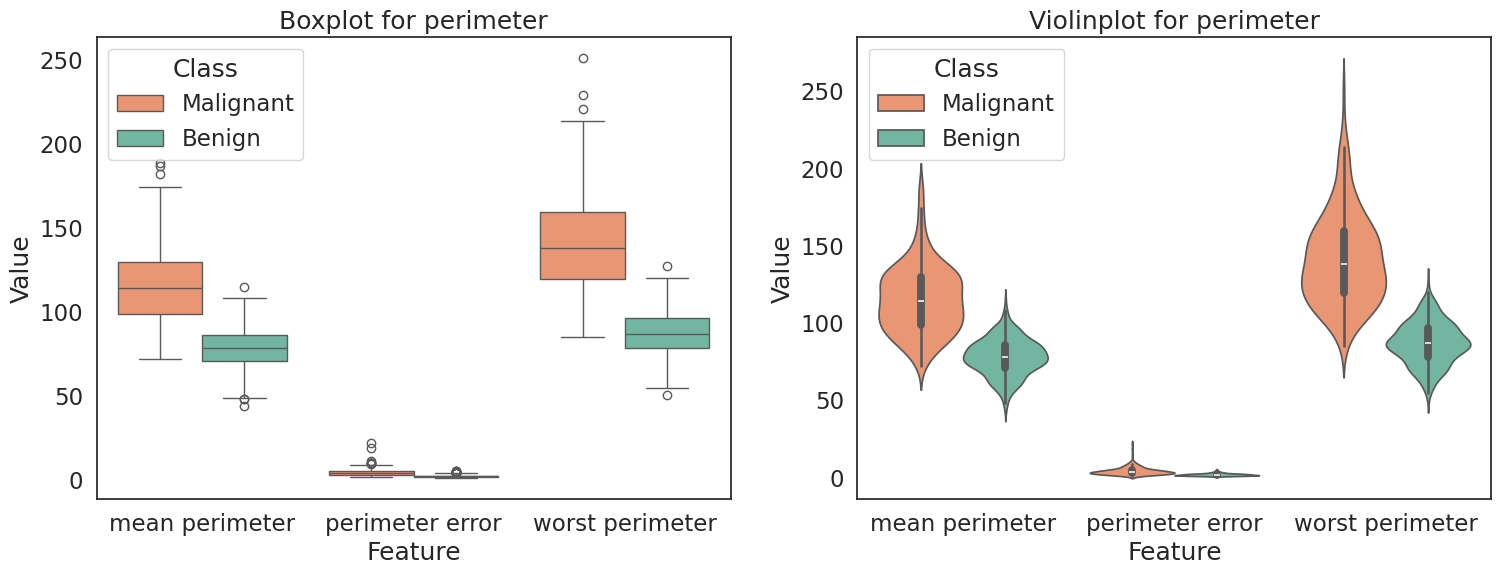

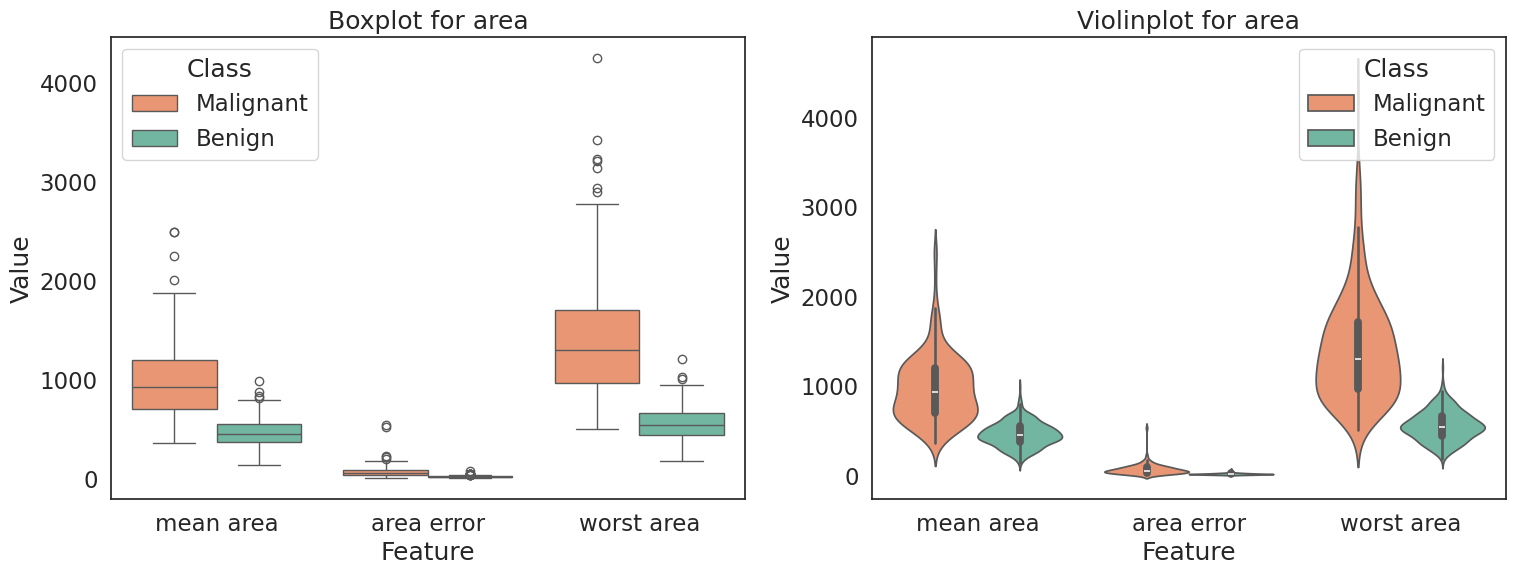

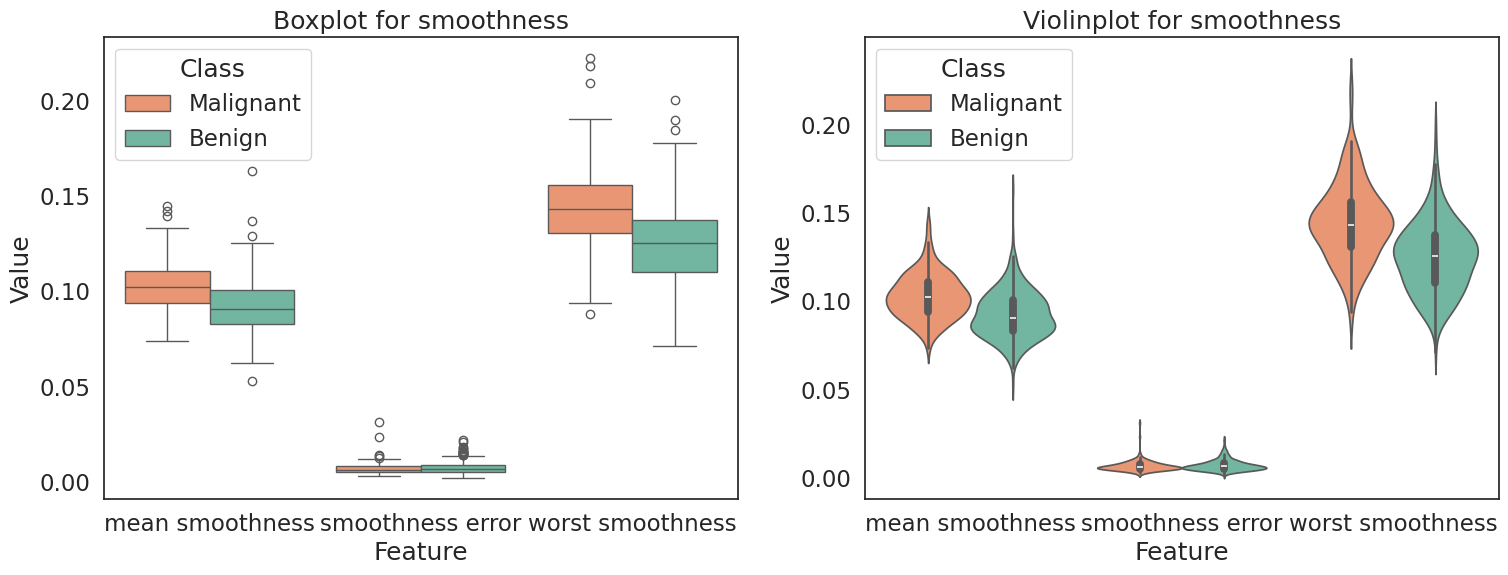

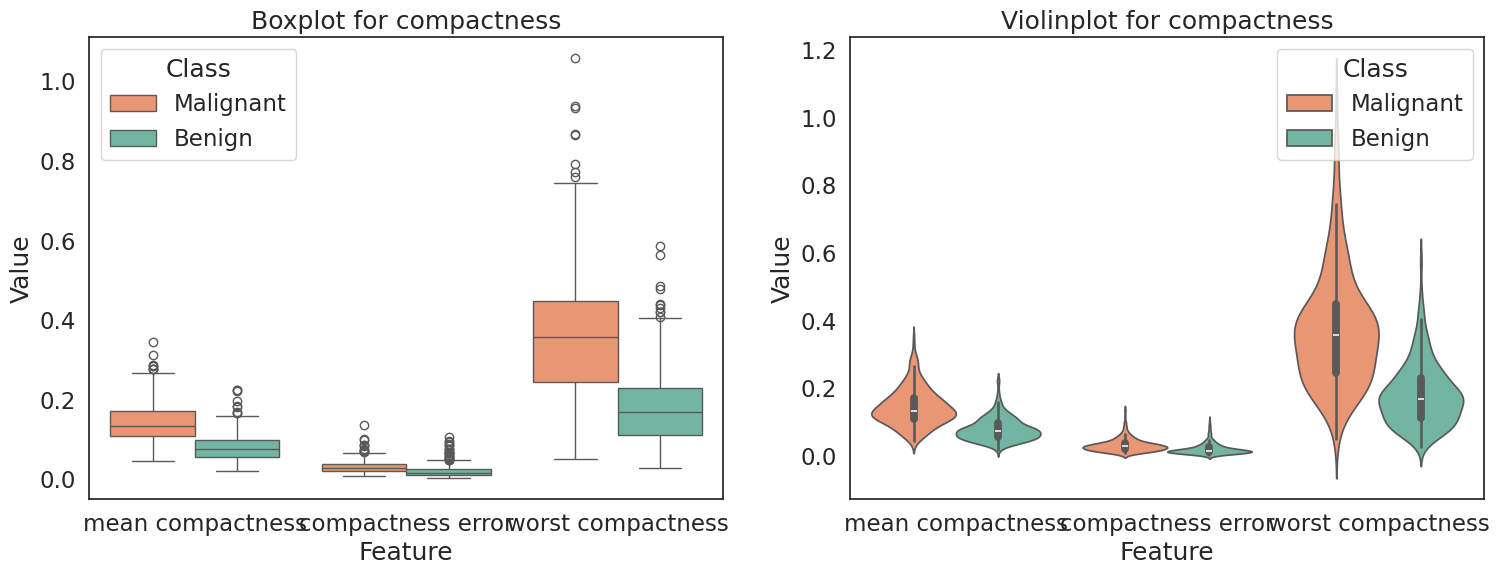

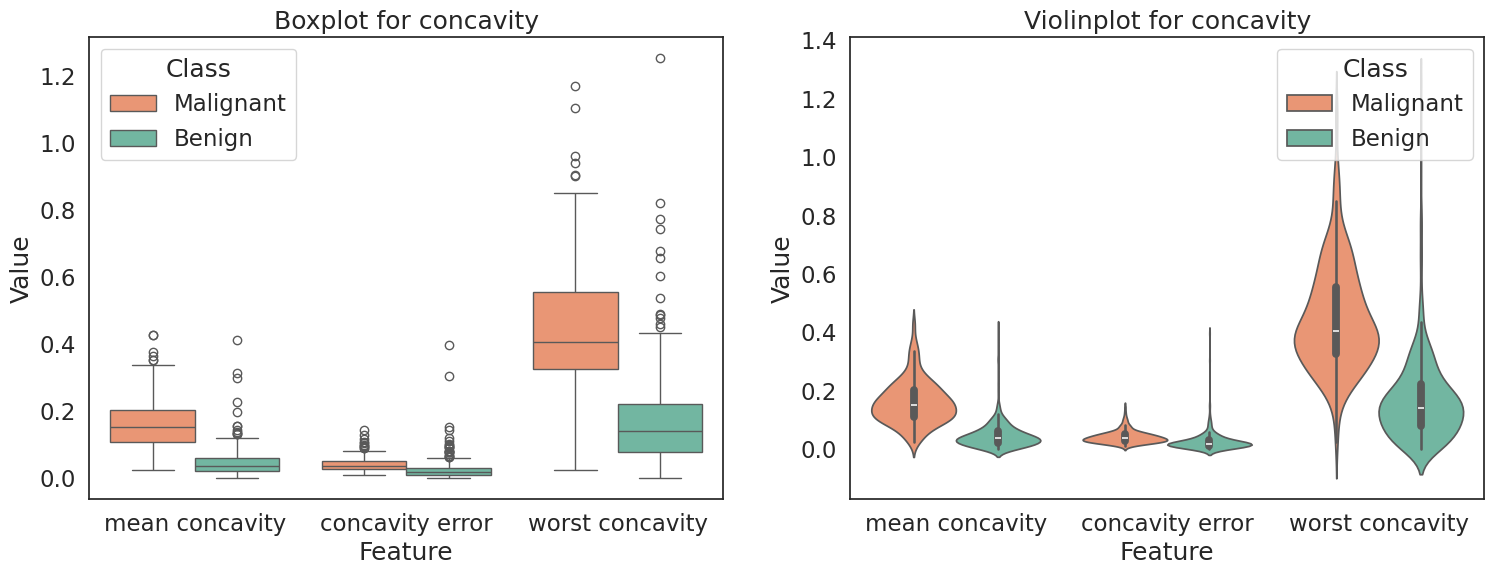

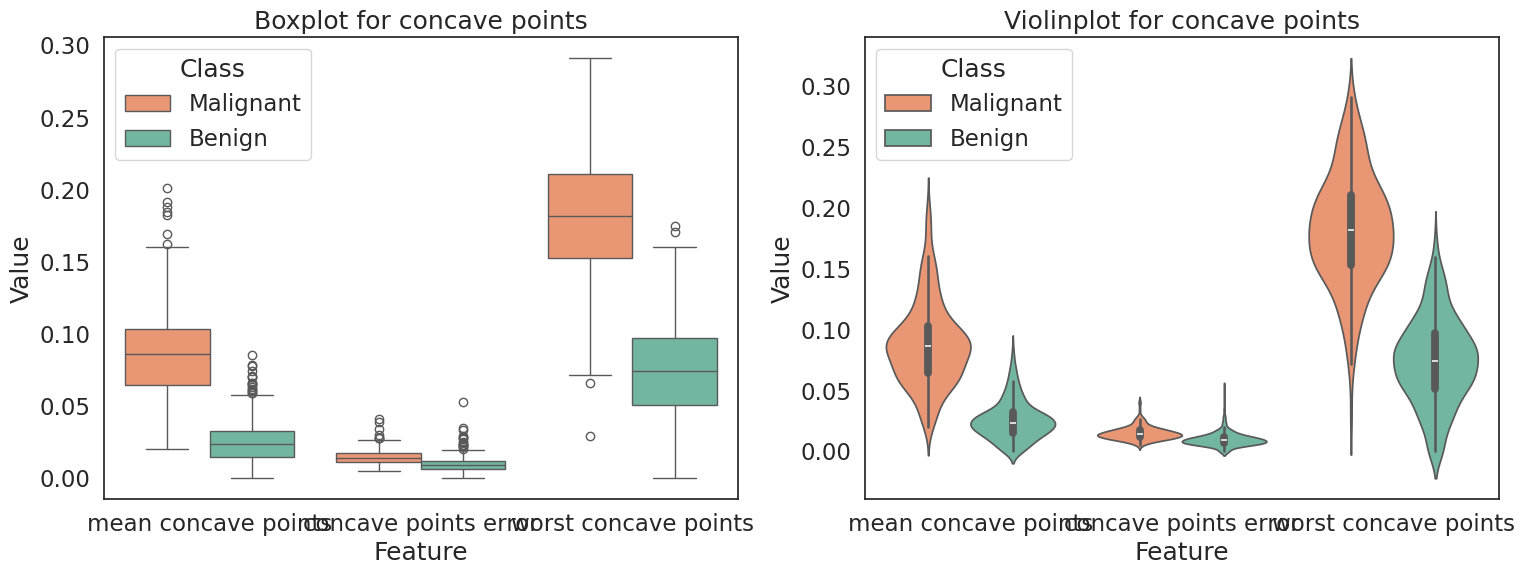

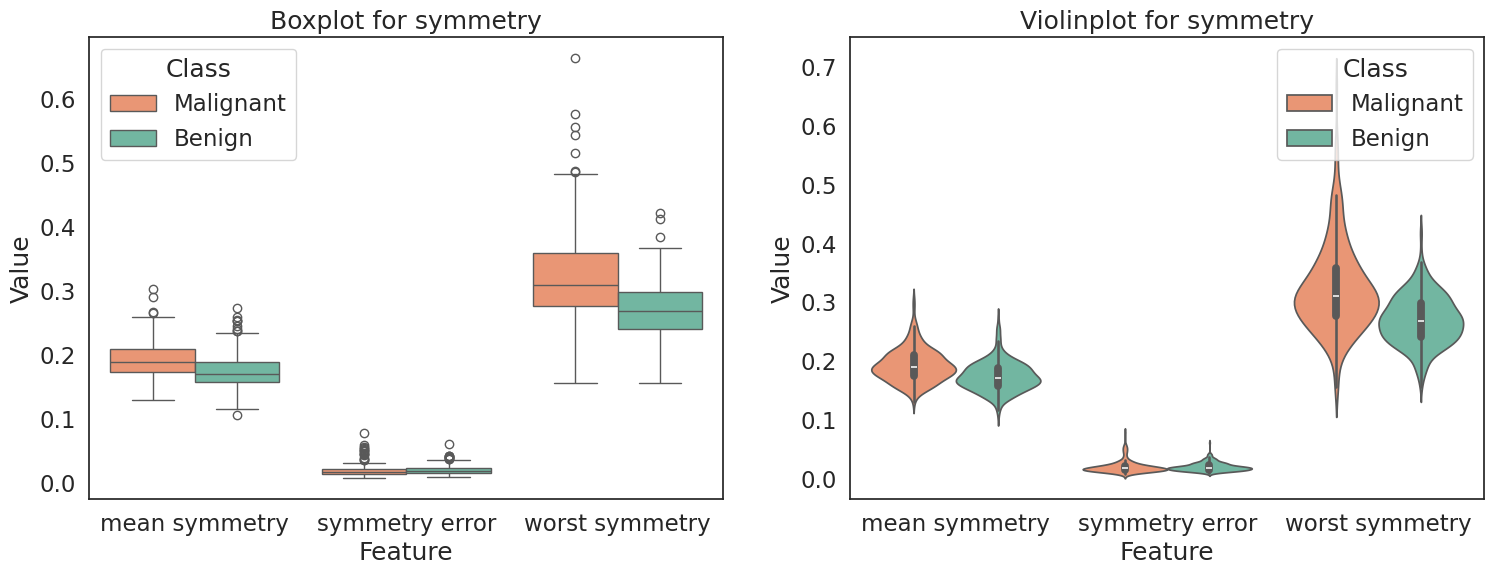

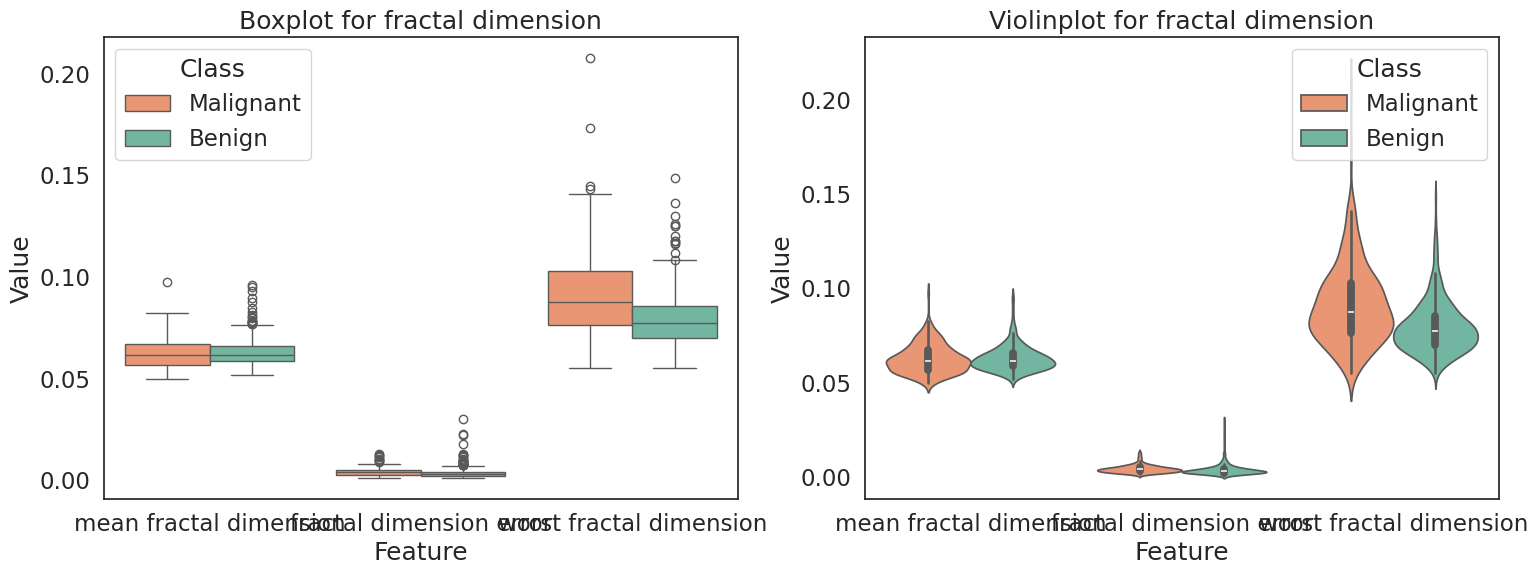

In [ ]:
# Define the features you're interested in
feature_groups = ['mean', 'error', 'worst']
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
            'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']

sns.set_palette(set2_palette)

for j, feature in enumerate(features):
    columns = ['target']

    for i, group in enumerate(feature_groups):
        if group == 'error':
            column = f'{feature} {group}'
        else:
            column = f'{group} {feature}'

        columns.append(column)

    new_df = pd.DataFrame(labeled_df[columns])
    # print(columns)
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    
    new_df = pd.melt(new_df, id_vars='target')

    sns.boxplot(x='variable', y='value', hue='target', data=new_df, ax=axs[0])
    sns.violinplot(x='variable', y='value', hue='target', data=new_df, density_norm='width', ax=axs[1])
    
    axs[0].set_title(f'Boxplot for {feature}')
    axs[0].set_xlabel('Feature')
    axs[0].set_ylabel('Value')
    axs[0].legend(title='Class')
    
    axs[1].set_title(f'Violinplot for {feature}')
    axs[1].set_xlabel('Feature')
    axs[1].set_ylabel('Value')
    axs[1].legend(title='Class')
    
    

With boxplots and violinplots we can see the distribution of the data in another way, in the boxplot the middle line shows us the median, while the lines below and above shows us the first and third quartiles. The whiskers show us the range of the data, and the points outside the whiskers are the outliers. With the violinplot we obtain more or less the same inormation with the addition of the density of the data.

Using these plots, we can see that there are some features that most features have a lot of outliers. We can also see which features have more difference between the classes, for example, in the mean and worst concave points the box from malignant is not even in the same range as the box from benign, this indicates that this feature can be really useful for the classification.

## 3. Data Preprocessing

Once we have finished exploring the data, we can start preparing it for the classifiers.

The following steps are going to be a demonstration of how the preprocessing works, and how it would tipically be done if we weren't using cross-validation and grid search. However, we are not going to apply this steps when using our classifiers since to use cross validation and gridsearch to avoid data leakage, because we would be modifying the validation set and using it to standardize the data or select the best components.

The main goal of this section is to understand how the data is going to be transformed when we use it in the pipelines.

- **Split the data** into training and testing sets. We will use 70/30 as the split ratio and we will only modify the training set. In the cross validation section the split will depend on the number of folds.
- Check that training and testing sets have a similar class distribution.
- **Scale the data** and show the difference between the scaled and unscaled data. 
- **Apply PCA** to reduce the dimensionality of the data.
- Check the correlation matrix after PCA.
- Maybe try Deep Convolutional Neural Networks on the training data since they are good at extracting features from images (although we don't have the images but the features extracted from them).

### 3.1 Splitting the data

When training a classifier we need to split the data into training and testing, this is so that after we have trained it we can test it with unseen data.

Now we are going to do a 70/30 split, 70 for training and 30 for testing. But when we do cross validation we will do a different split that will depend on the number of folds.

In [ ]:
# Split the data into train and test sets

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

After splitting the data we are going to check that the class distribution is similar in both the sets.

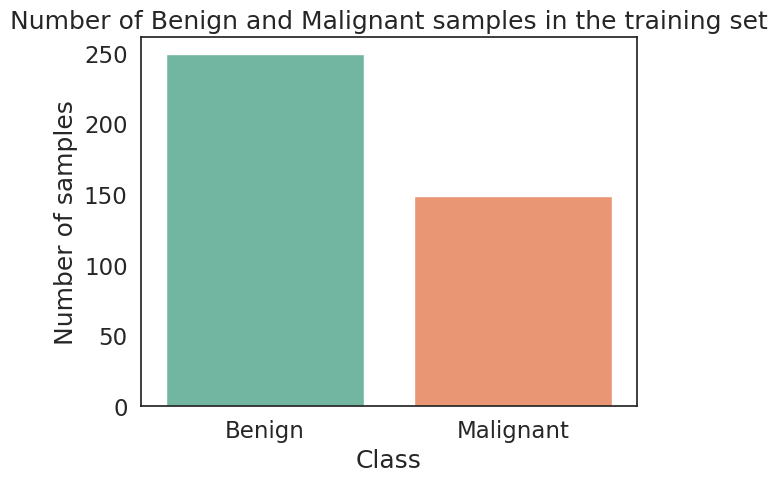

Total number of samples in the training set: 398
Percentage of Benign samples: 62.56 %
Percentage of Malignant samples: 37.44 %


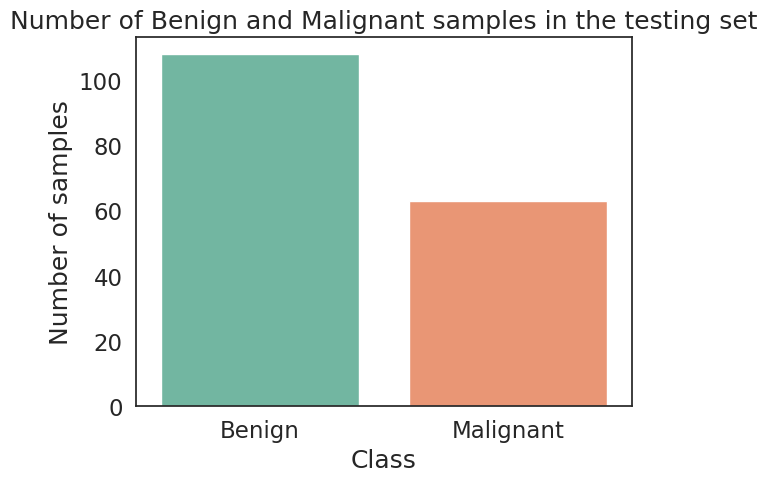

Total number of samples in the testing set: 171
Percentage of Benign samples: 63.16 %
Percentage of Malignant samples: 36.84 %


In [ ]:
labeled_train = X_train.copy()
labeled_train['target'] = y_train.replace({0: 'Benign', 1: 'Malignant'})

labeled_test = X_test.copy()
labeled_test['target'] = y_test.replace({0: 'Benign', 1: 'Malignant'})

sns.set_palette('Set2')

sns.countplot(x='target', hue='target', data=labeled_train)
plt.title('Number of Benign and Malignant samples in the training set')
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()

print('Total number of samples in the training set:', len(labeled_train))
print('Percentage of Benign samples:', round(labeled_train['target'].value_counts()['Benign'] / len(labeled_train) * 100, 2), '%')
print('Percentage of Malignant samples:', round(labeled_train['target'].value_counts()['Malignant'] / len(labeled_train) * 100, 2), '%')

sns.set_palette(set2_palette)
sns.countplot(x='target', hue='target', data=labeled_test, order=['Benign', 'Malignant'])
plt.title('Number of Benign and Malignant samples in the testing set')
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()

print('Total number of samples in the testing set:', len(labeled_test))
print('Percentage of Benign samples:', round(labeled_test['target'].value_counts()['Benign'] / len(labeled_test) * 100, 2), '%')
print('Percentage of Malignant samples:', round(labeled_test['target'].value_counts()['Malignant'] / len(labeled_test) * 100, 2), '%')


The class distribution is ~63% benign and ~37% malignant in both the training and testing sets, so we can say that the split was successful.

### 3.2 Scaling the data

After splitting the data, we will scale the training set since we saw in the EDA that the data was not centered and was really spread out.

But an important thing to note is that we only need to fit the scaler to the training set, and then transform both the training and testing sets. This is because if we fit the scaler to the testing set, we would be using information from the testing set to scale the training set, which would be a form of data leakage. So if we want to use cross-validation or grid search and we scale the data now, we will have this problem. To avoid this, we will use pipelines.

Although now we will scale the data just to show how the data is altered by the scaling, for the classifiers we will use pipelines.

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

Let's see how the distribution of the data looks like after scaling it.

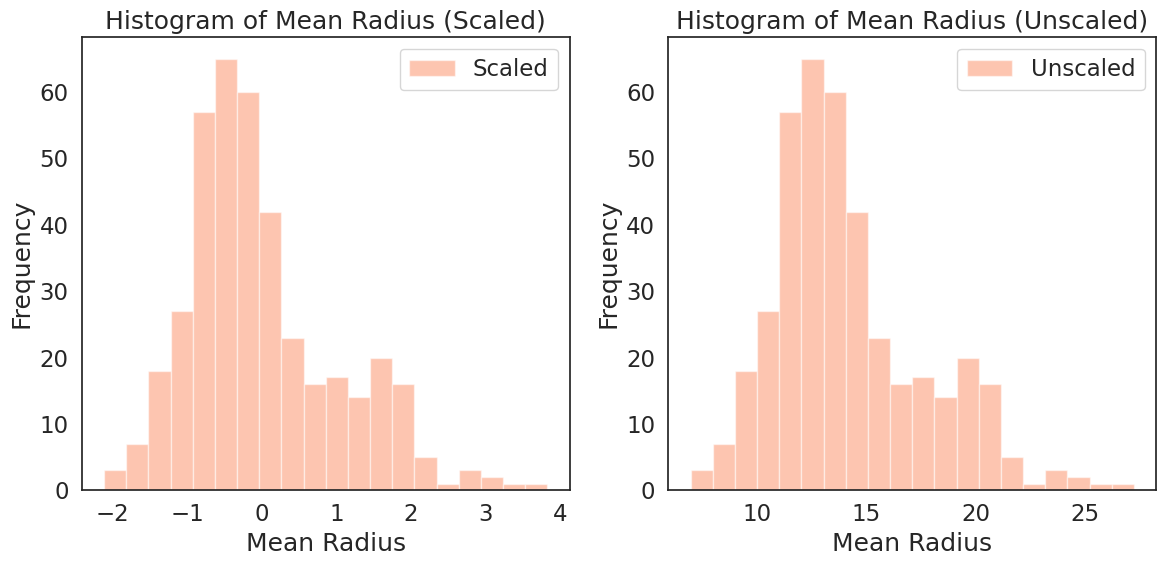

Scaled Data:
Mean: -0.0
Standard Deviation: 1.001

Unscaled Data:
Mean: 14.176
Standard Deviation: 3.412


In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

mean_radius_scaled = X_train_scaled_df['mean radius']
mean_radius_unscaled = X_train_df['mean radius']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.set_palette('Set2')

axs[0].hist(mean_radius_scaled, bins=20, alpha=0.5, label='Scaled')
axs[0].set_xlabel('Mean Radius')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Mean Radius (Scaled)')
axs[0].legend()

axs[1].hist(mean_radius_unscaled, bins=20, alpha=0.5, label='Unscaled')
axs[1].set_xlabel('Mean Radius')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Mean Radius (Unscaled)')
axs[1].legend()

plt.tight_layout()
plt.show()

print('Scaled Data:')
print('Mean:', round(mean_radius_scaled.mean(), 3))
print('Standard Deviation:', round(mean_radius_scaled.std(), 3))

print('\nUnscaled Data:')
print('Mean:', round(mean_radius_unscaled.mean(), 3))
print('Standard Deviation:', round(mean_radius_unscaled.std(), 3))



Once the data is scaled, we can see that now the mean is 0 and the standard deviation is 1, but the histograms' shapes are consistent, this is because we only scaled the data but didn't alter its distribution. This was just a demonstration, since we will use pipelines in the next section in order to avoid data leakage when using cross-validation or grid search.

### 3.3 Applying PCA

In the Exploratory Data Analysis we saw that there were features that were highly correlated, so what we are going to do is to apply a technique called Principal Component Analysis (PCA) which will reduce the dimensionality of the features while keeping the most important ones. Once again, since we will use cross-validation and grid search, this is just a demonstration, we will use pipelines when creating the classifiers.

To decide the number of components that we are going to keep there are two main methods:
- **Kaiser Criterion:** We keep the components with eigenvalues greater than 1. For this we can plot a scree plot which shows the eigenvalues of each component.
- **Cumulative Variance:** We keep the components that explain a certain percentage of the variance, for example 95%.

In this case we will use the cumulative variance method, since both methods are proven to work well and this one will be easier to implement into a pipeline.

As it was previously mentioned, this part's purpose is to demonstrate how PCA works, so we will use it over the scaled data since it is what will be happening in the pipeline too.

Also it is important to clarify that a component is not a feature, it is a linear combination of the features, so we will not be able to interpret the components as we would do with the features.

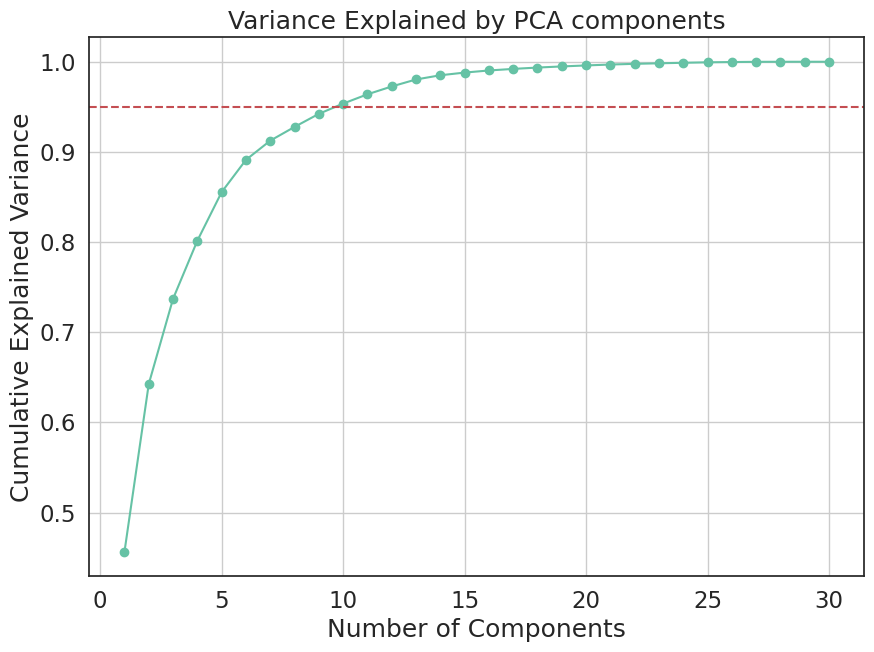

In [ ]:
pca = PCA()
pca.fit(X_train_scaled)

explained_variance = pca.explained_variance_ratio_

n_components = np.arange(1, len(explained_variance) + 1)

plt.figure(figsize=(10, 7))
plt.plot(n_components, np.cumsum(explained_variance), 'o-')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA components')
plt.grid(True)
plt.show()


As we can see from the variance explained plot, the first components make the variance increase a lot, but  after a few components the growth slows down. Looking at the red line that indicates the 95% of the cumulative explained variance, we can see that with just the first 10 components we can achieve it.

We will now check it by obtaining the cumulative explained variance of 0.95 and observing how many components we needed to achieve it, we will also have a glance at which features contribute the most to the first components.

In [ ]:
feature_names = list(df.columns)

# we choose the n of components that give us 95% of the variance
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

n_features = 5

for i, component in enumerate(pca.components_):
    top_n_idx = np.argsort(component)[-n_features:][::-1]
    top_n_features = [(feature_names[i], round(component[i], 2)) for i in top_n_idx]
    print(f"\nFor component {i}, the top {n_features} contributing features and their weights are:\n")
    for feature, weight in top_n_features:
        print(f"{feature}({weight})")



For component 0, the top 5 contributing features and their weights are:

mean concave points(0.26)
mean concavity(0.25)
worst concave points(0.25)
mean compactness(0.24)
worst perimeter(0.23)

For component 1, the top 5 contributing features and their weights are:

mean fractal dimension(0.36)
fractal dimension error(0.28)
worst fractal dimension(0.26)
compactness error(0.23)
concavity error(0.2)

For component 2, the top 5 contributing features and their weights are:

texture error(0.4)
smoothness error(0.31)
symmetry error(0.27)
radius error(0.26)
perimeter error(0.25)

For component 3, the top 5 contributing features and their weights are:

worst texture(0.63)
mean texture(0.61)
texture error(0.33)
worst compactness(0.11)
worst fractal dimension(0.1)

For component 4, the top 5 contributing features and their weights are:

concavity error(0.38)
fractal dimension error(0.28)
compactness error(0.27)
concave points error(0.21)
worst concavity(0.2)

For component 5, the top 5 contribut

As we can see the components are made up of features with different weights so they are not as interpretable as the plain features, but what we can observe is that for example in the first component, the features that contribute the most are mean concave points, mean concavity and worst concave points, which if we recall from the analysis these features were easily separable so they are the component that contributes the most to the variance, but also they were highly correlated, so they get merged into one component avoiding the multicollinearity problem.

Let's now check the state of the correlation matrix after applying PCA.

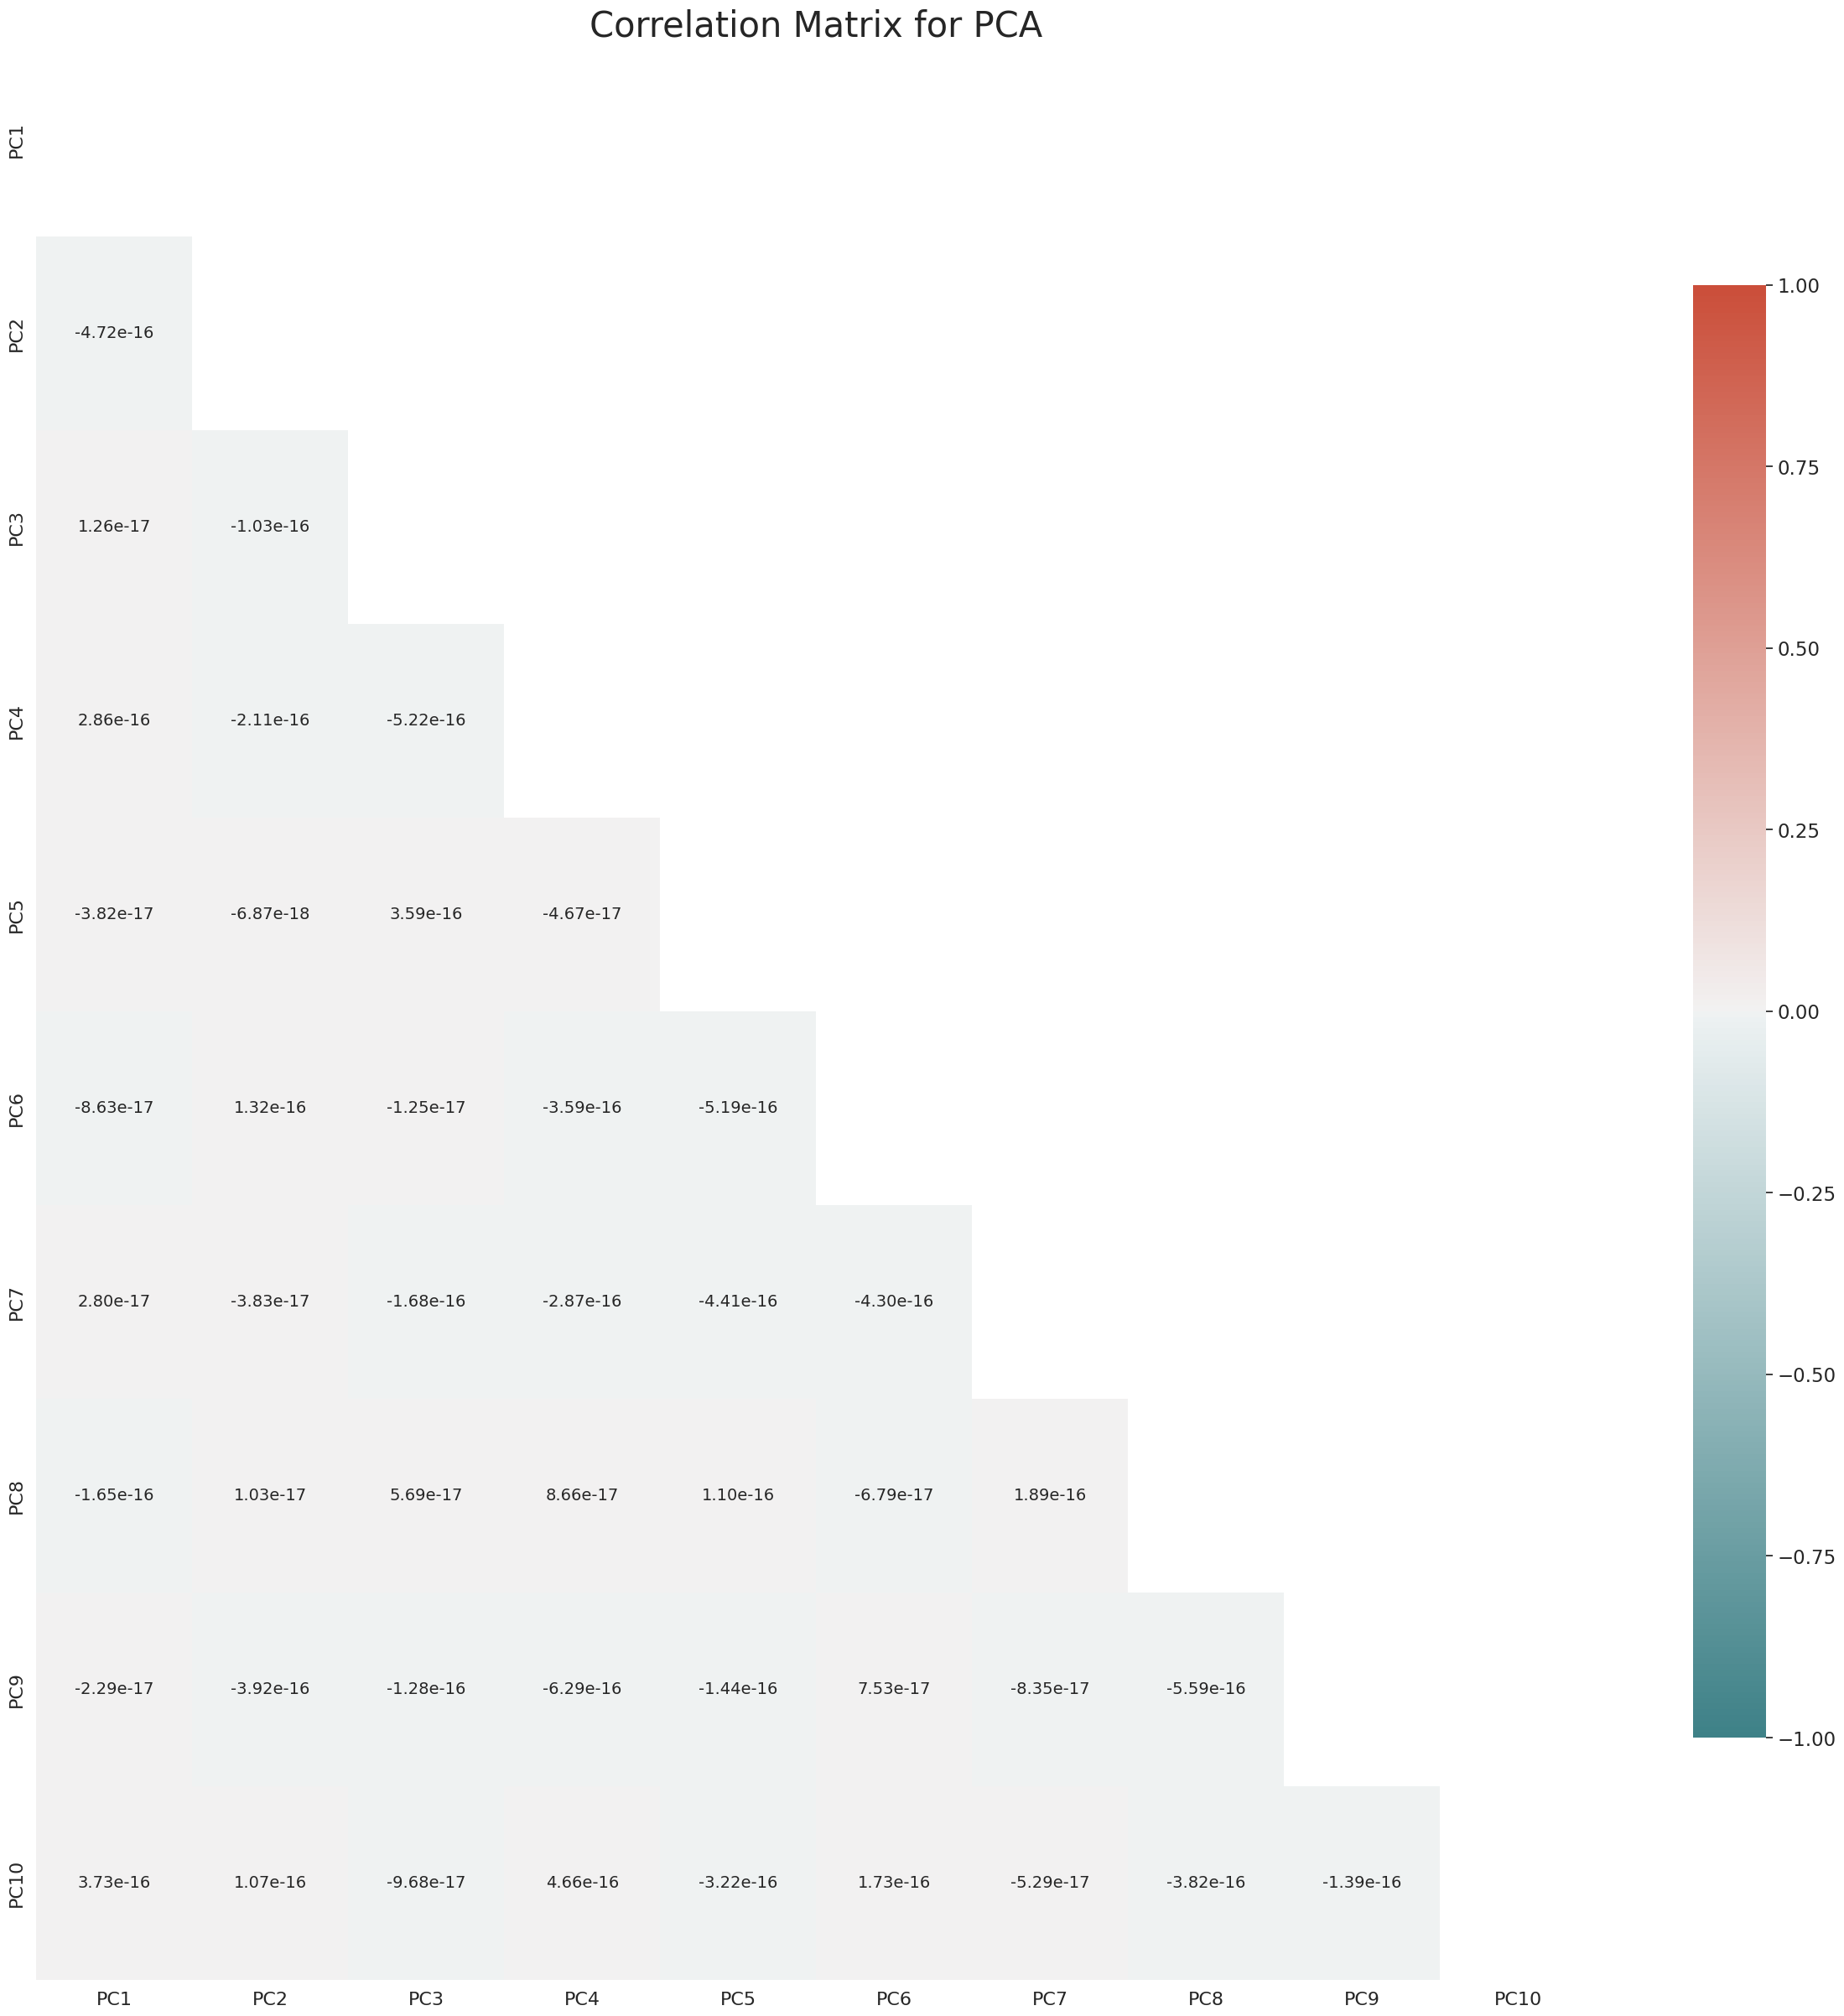

In [ ]:

df_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

corr_pca = df_pca.corr()


plt.figure(figsize=(30, 30))

mask = np.triu(np.ones_like(corr_pca, dtype=bool))

# this is so instead of showing 20 decimals, we get the scientific notation
def fmt(x):
    return '{:.2e}'.format(x)

annot = np.vectorize(fmt)(corr_pca.values)

sns.heatmap(corr_pca, mask=mask, annot=annot, fmt="", cmap=set2_diverging_palette,
            vmin=-1, vmax=1, cbar_kws={"shrink": 0.75}, annot_kws={"fontsize": 14})

plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Correlation Matrix for PCA", fontsize=30)
plt.show()


As we can see, the correlation between the features is now almost 0, it is so small that we even needed to make a custom function to print the values in scientific notation. This means that we have now avoided the multicollinearity problem.

Remember that this was just a demonstration and this is not the data that we will be using since if we want to use cross-validation or grid search we can't modify the data before since it would result in data leakage